# **WORKED EXAMPLE 1:**

# Car Price Prediction


### Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

    - Which variables are significant in predicting the price of a car
    - How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market.

### Business Goal

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [41]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1: Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [42]:
cars = pd.read_csv('https://raw.githubusercontent.com/nikbearbrown/INFO_7390_Art_and_Science_of_Data/main/CSV/CarPrice_Assignment.csv')
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [43]:
cars.shape

(205, 26)

In [44]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [45]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### Step 2 : Data Cleaning and Preparation

In [46]:
#Splitting company name from CarName column
CompanyName = cars['CarName'].apply(lambda x : x.split(' ')[0])
cars.insert(3,"CompanyName",CompanyName)
cars.drop(['CarName'],axis=1,inplace=True)
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [47]:
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

##### Fixing invalid values
- There seems to be some spelling error in the CompanyName column.

    - maxda = mazda
    - Nissan = nissan
    - porsche = porcshce
    - toyota = toyouta
    - vokswagen = volkswagen =  vw

In [48]:
cars.CompanyName = cars.CompanyName.str.lower()

def replace_name(a,b):
    cars.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [49]:
#Checking for duplicates
cars.loc[cars.duplicated()]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [50]:
cars.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

### Step 3: Visualizing the data


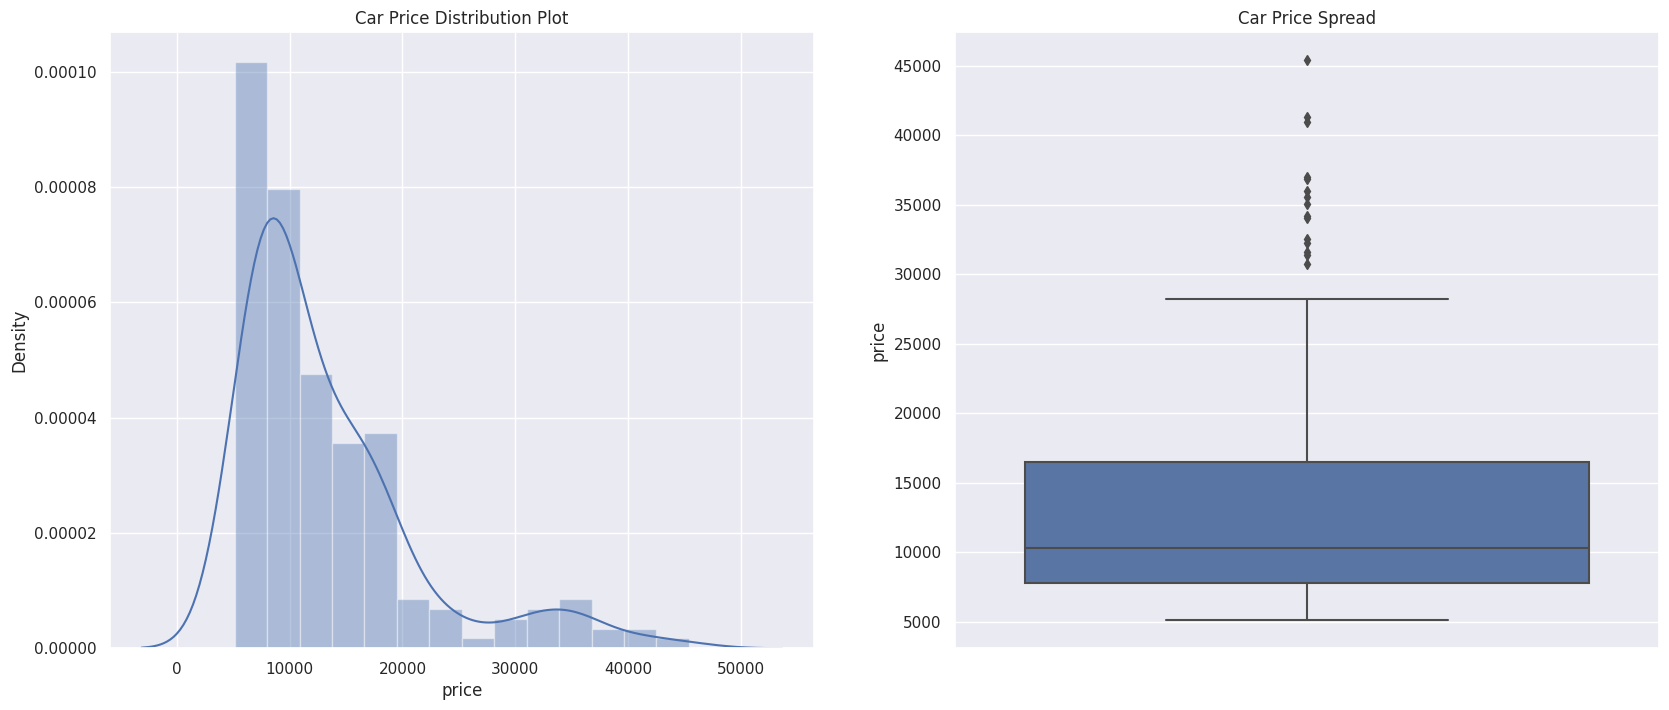

In [51]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(cars.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=cars.price)

plt.show()

In [52]:
print(cars.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


#### Inference :

1. The plot seemed to be right-skewed, meaning that the most prices in the dataset are low(Below 15,000).
2. There is a significant difference between the mean and the median of the price distribution.
3. The data points are far spread out from the mean, which indicates a high variance in the car prices.(85% of the prices are below 18,500, whereas the remaining 15% are between 18,500 and 45,400.)

#### Step 3.1 : Visualising Categorical Data

    - CompanyName
    - Symboling
    - fueltype
    - enginetype
    - carbody
    - doornumber
    - enginelocation
    - fuelsystem
    - cylindernumber
    - aspiration
    - drivewheel

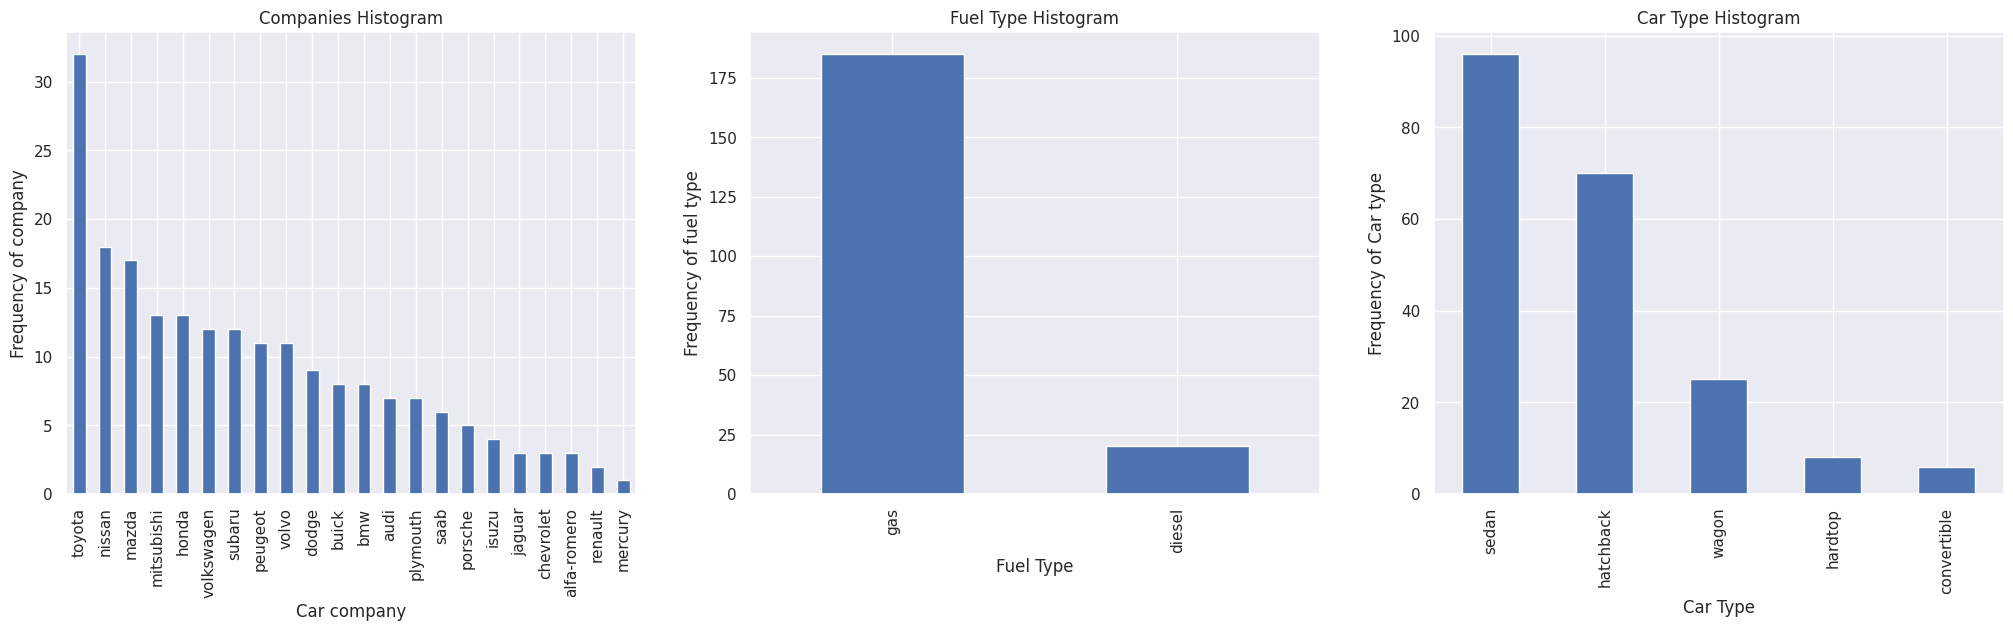

In [53]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = cars.CompanyName.value_counts().plot(kind='bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = cars.fueltype.value_counts().plot(kind='bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = cars.carbody.value_counts().plot(kind='bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

#### Inference :

1. Toyota seemed to be favored car company.
2. Number of gafueled cars are more than diesel.
3. sedan is the top car type prefered.

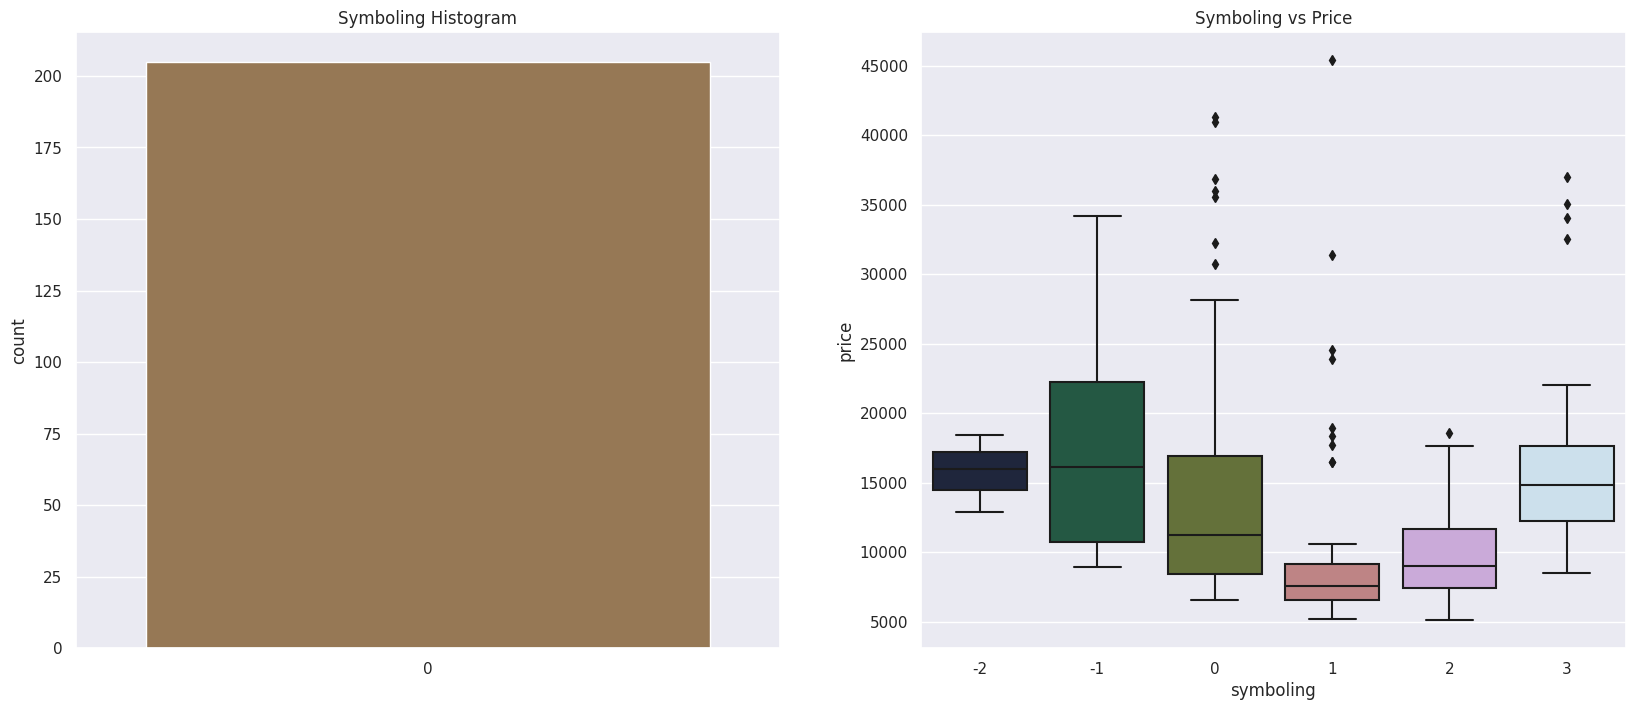

In [54]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(cars.symboling, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=cars.symboling, y=cars.price, palette=("cubehelix"))

plt.show()

#### Inference :

1. It seems that the symboling with 0 and 1 values have high number of rows (i.e. They are most sold.)
2. The cars with -1 symboling seems to be high priced (as it makes sense too, insurance risk rating -1 is quite good). But it seems that symboling with 3 value has the price range similar to -2 value. There is a dip in price at symboling 1.

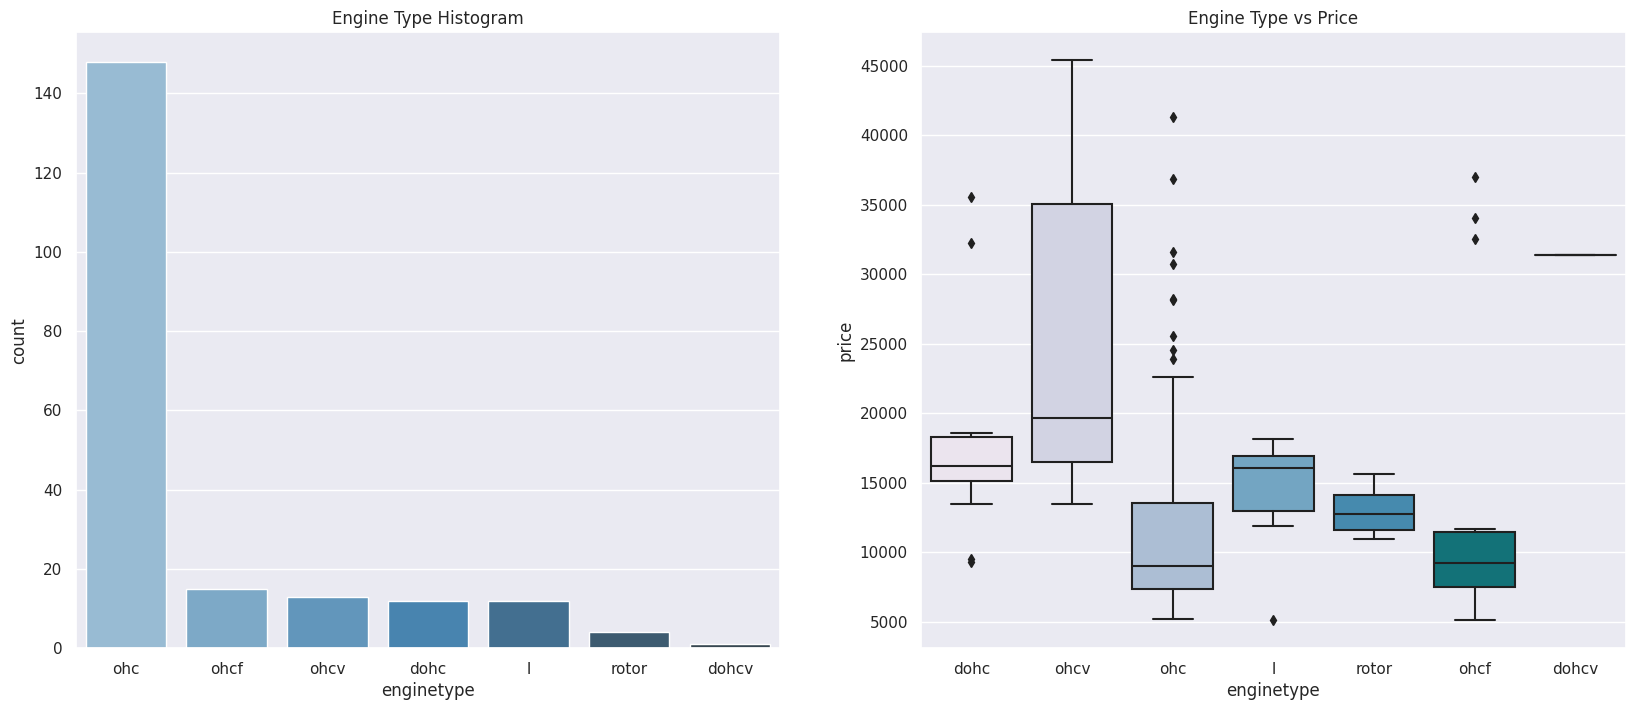

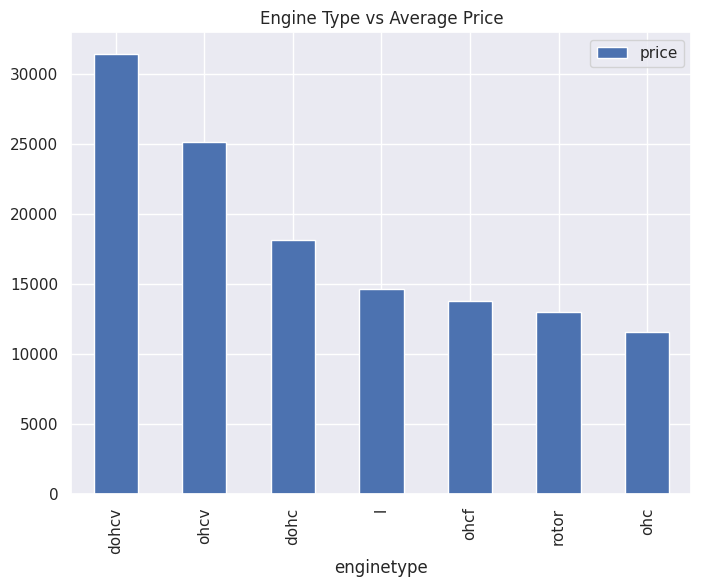

In [55]:

plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.title('Engine Type Histogram')
sns.countplot(data=cars, x='enginetype', palette=("Blues_d"), order=cars['enginetype'].value_counts().index)

plt.subplot(1, 2, 2)
plt.title('Engine Type vs Price')
sns.boxplot(data=cars, x='enginetype', y='price', palette=("PuBuGn"))

plt.show()

df = pd.DataFrame(cars.groupby(['enginetype'])['price'].mean().sort_values(ascending=False))
df.plot.bar(figsize=(8, 6))
plt.title('Engine Type vs Average Price')
plt.show()

#### Inference :

1. ohc Engine type seems to be most favored type.
2. ohcv has the highest price range (While dohcv has only one row), ohc and ohcf have the low price range.

<Figure size 2500x600 with 0 Axes>

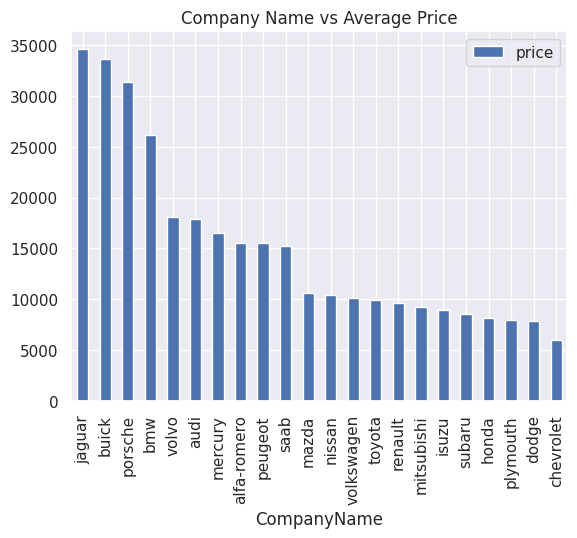

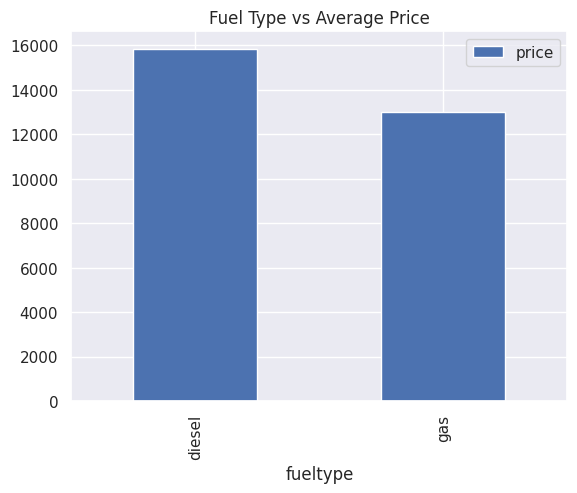

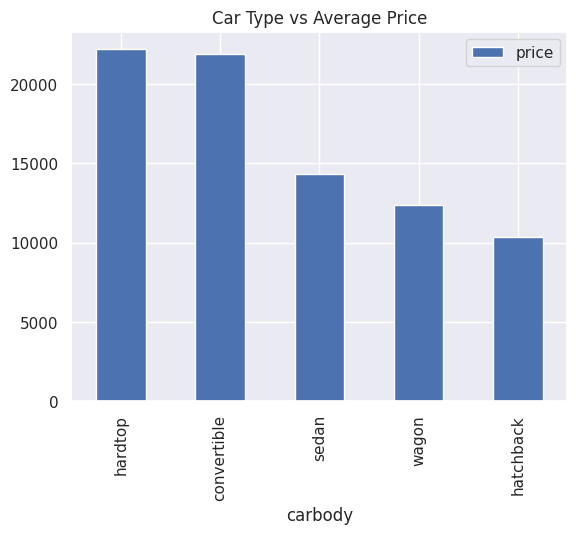

In [56]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(cars.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

df = pd.DataFrame(cars.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

df = pd.DataFrame(cars.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

#### Inference :

1. Jaguar and Buick seem to have highest average price.
2. diesel has higher average price than  gas.
3. hardtop and convertible have higher average price.

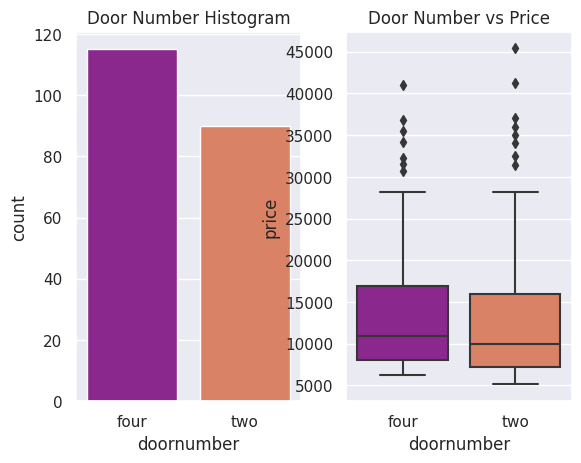

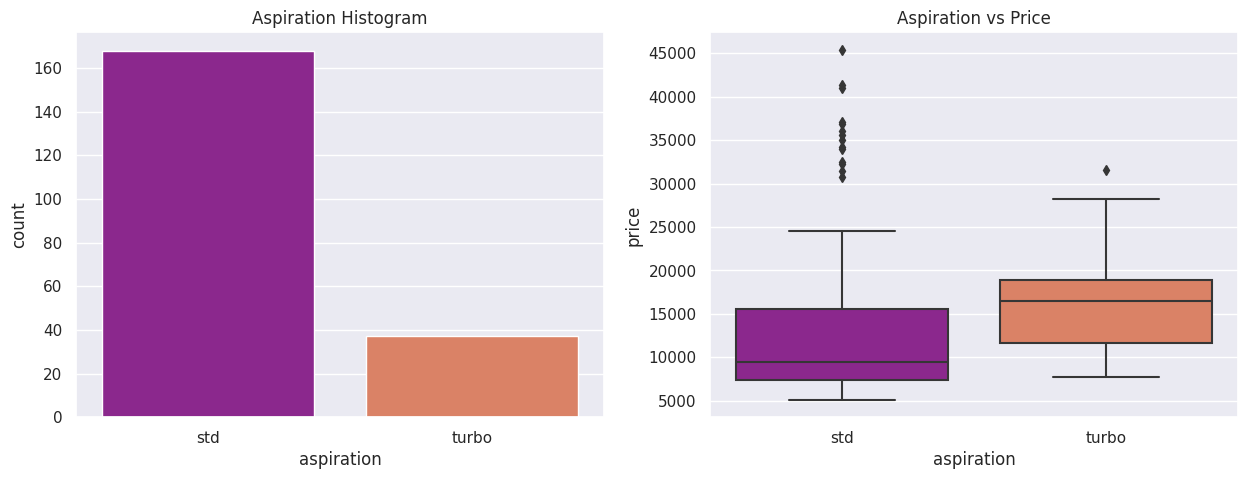

In [57]:
plt.subplot(1, 2, 1)
plt.title('Door Number Histogram')
sns.countplot(data=cars, x='doornumber', palette=("plasma"), order=cars['doornumber'].value_counts().index)

plt.subplot(1, 2, 2)
plt.title('Door Number vs Price')
sns.boxplot(data=cars, x='doornumber', y='price', palette=("plasma"), order=cars['doornumber'].value_counts().index)

plt.show()

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title('Aspiration Histogram')
sns.countplot(data=cars, x='aspiration', palette=("plasma"), order=cars['aspiration'].value_counts().index)

plt.subplot(1, 2, 2)
plt.title('Aspiration vs Price')
sns.boxplot(data=cars, x='aspiration', y='price', palette=("plasma"), order=cars['aspiration'].value_counts().index)

plt.show()

#### Inference :

1. doornumber variable is not affacting the price much. There is no sugnificant difference between the categories in it.
2. It seems aspiration with turbo have higher price range than the std (though it has some high values outside the whiskers.)

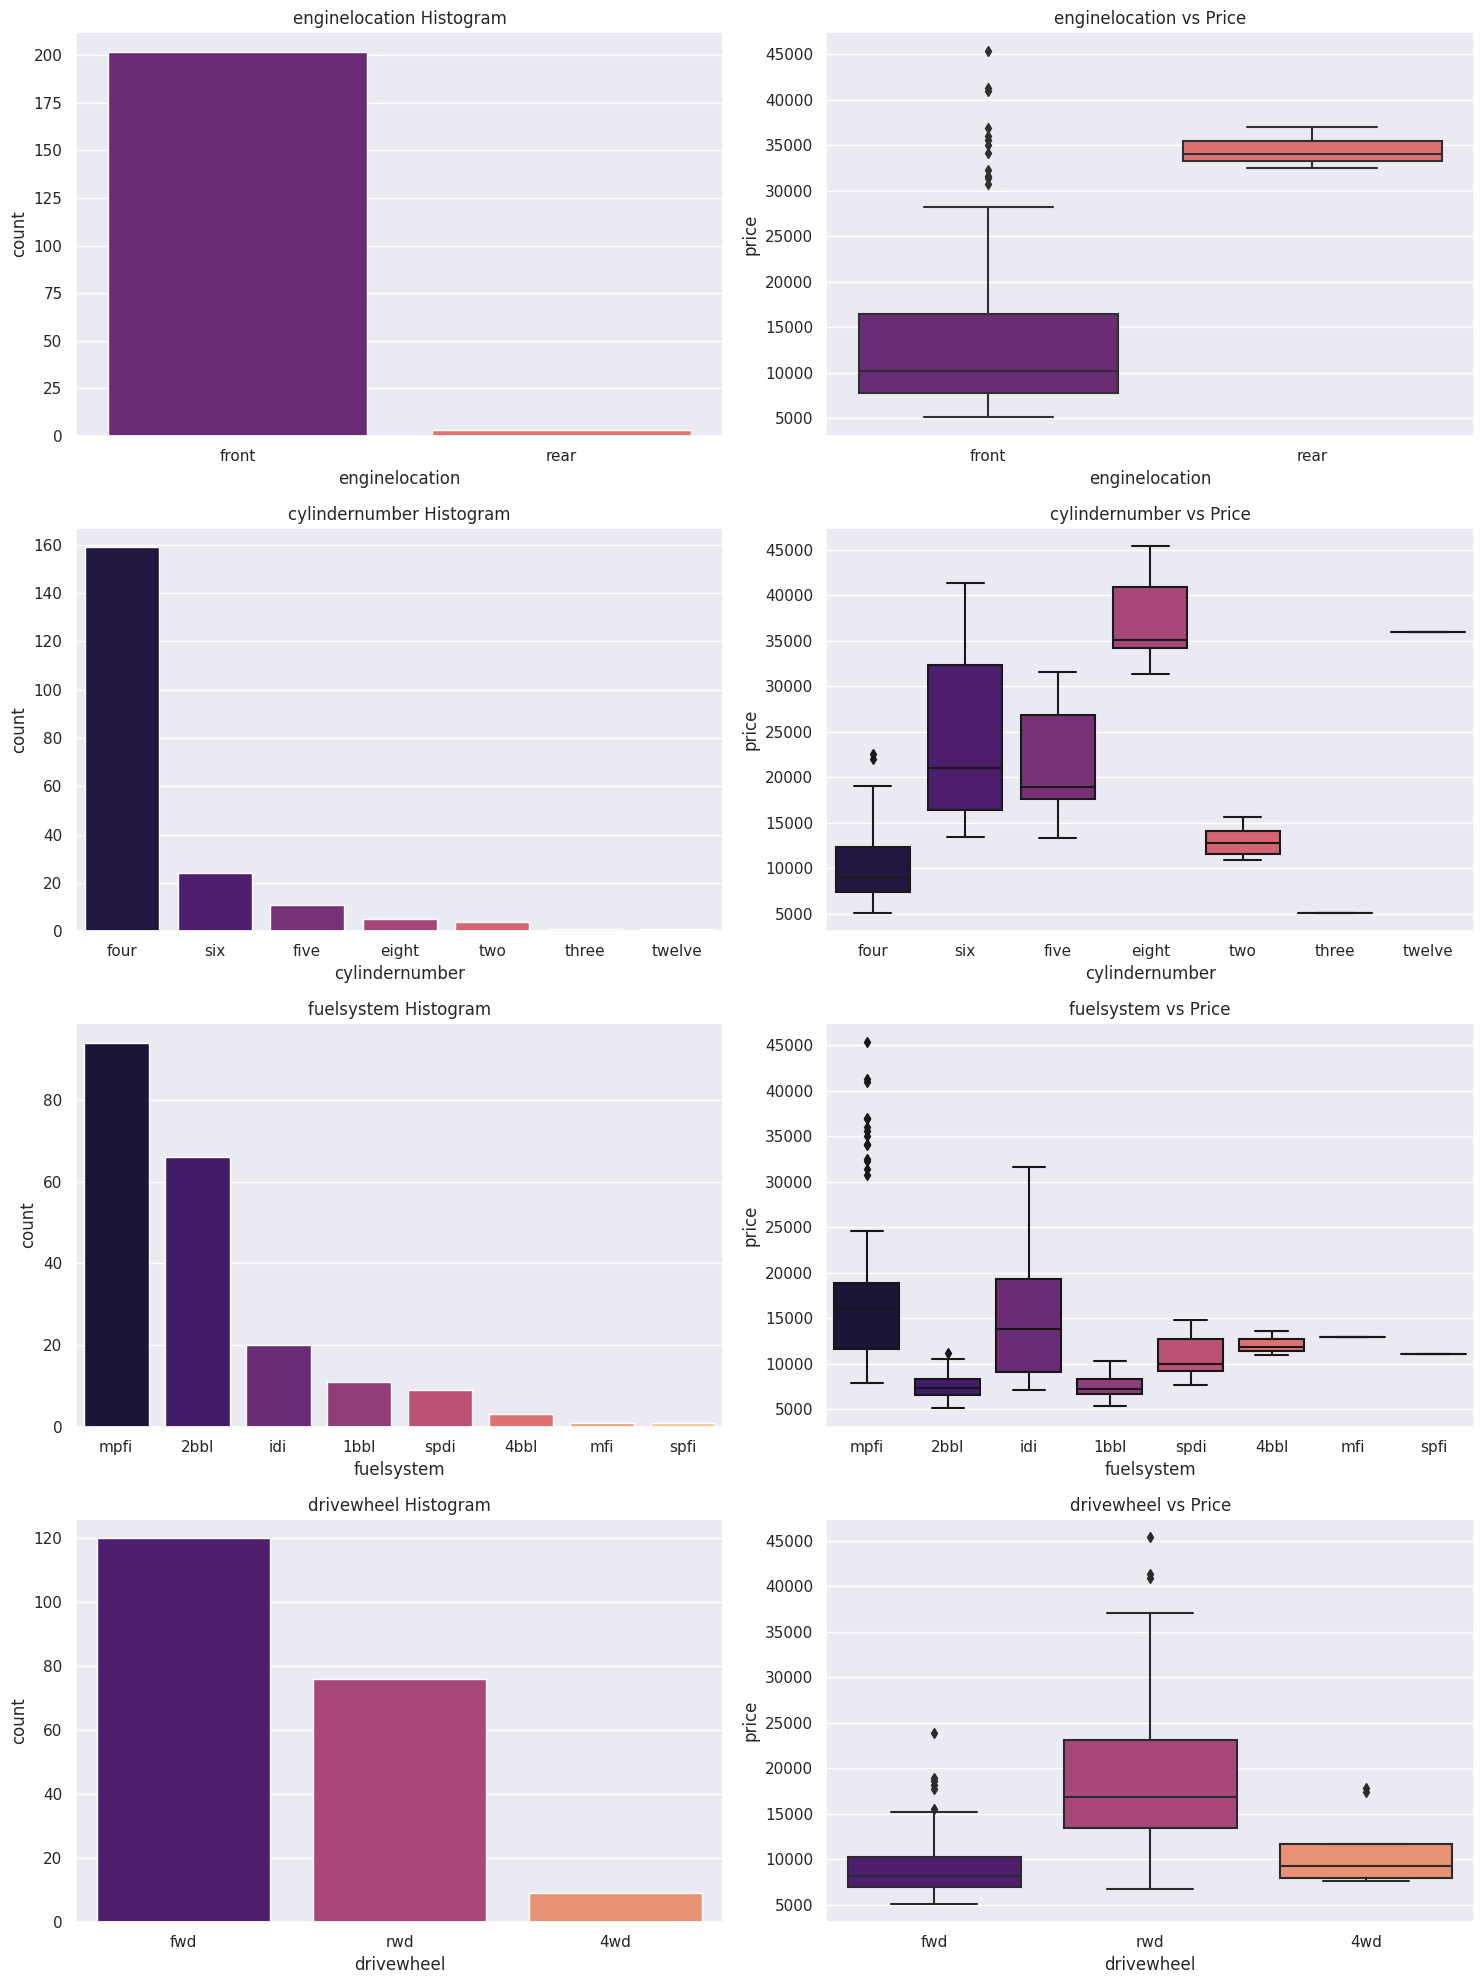

In [58]:
def plot_count(x, fig):
    plt.subplot(4, 2, fig)
    plt.title(x + ' Histogram')
    sns.countplot(data=cars, x=x, palette=("magma"), order=cars[x].value_counts().index)
    plt.subplot(4, 2, (fig + 1))
    plt.title(x + ' vs Price')
    sns.boxplot(data=cars, x=x, y='price', palette=("magma"), order=cars[x].value_counts().index)

plt.figure(figsize=(15, 20))

plot_count('enginelocation', 1)
plot_count('cylindernumber', 3)
plot_count('fuelsystem', 5)
plot_count('drivewheel', 7)

plt.tight_layout()

#### Inference :

1. Very few datapoints for enginelocation categories to make an inference.
2. Most common number of cylinders are four, six and five. Though eight cylinders have the highest price range.
3. mpfi and 2bbl are most common type of fuel systems. mpfi and idi having the highest price range. But there are few data for other categories to derive any meaningful inference
4. A very significant difference in drivewheel category. Most high ranged cars seeme to prefer rwd drivewheel.

#### Step 3.2 : Visualising numerical data

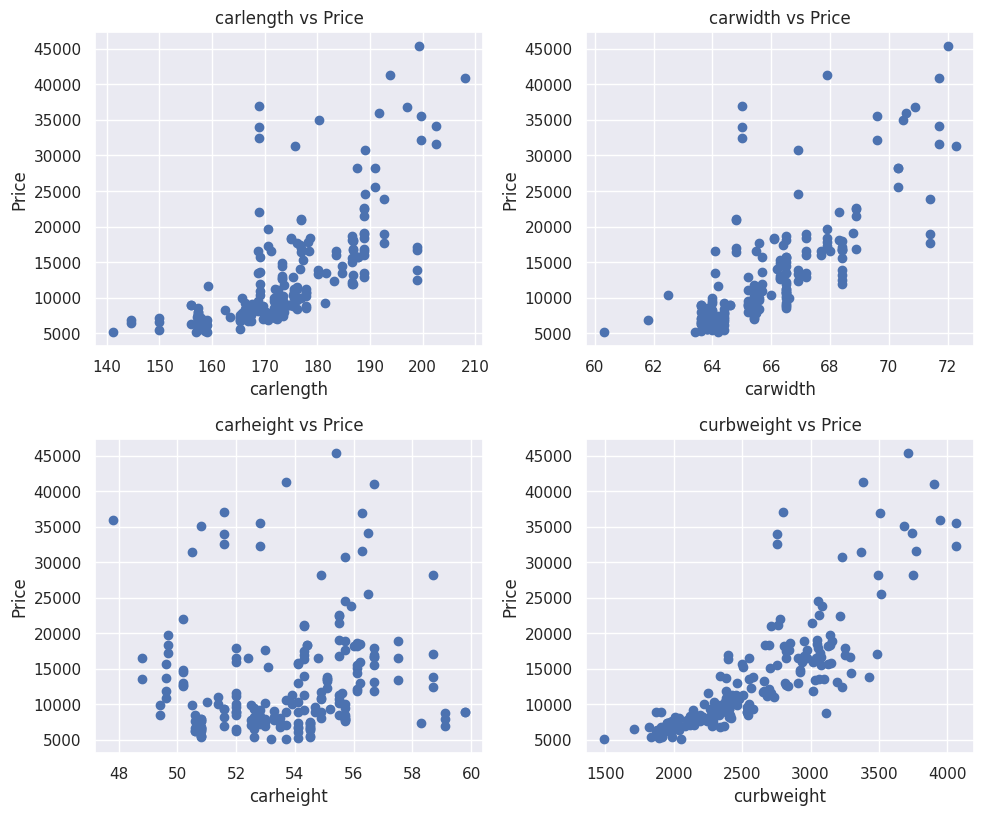

In [59]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(cars[x],cars['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()

#### Inference :

1. carwidth, carlength and curbweight seems to have a poitive correlation with price.
2. carheight doesn't show any significant trend with price.

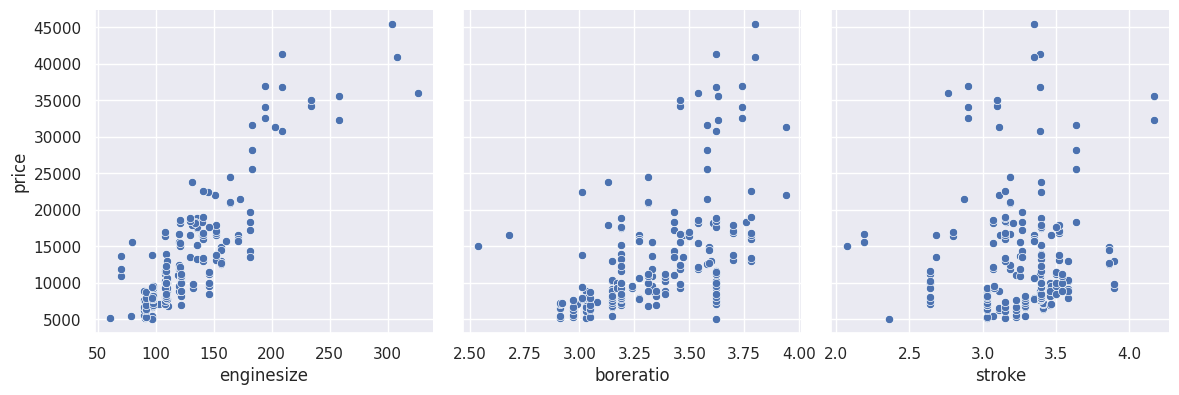

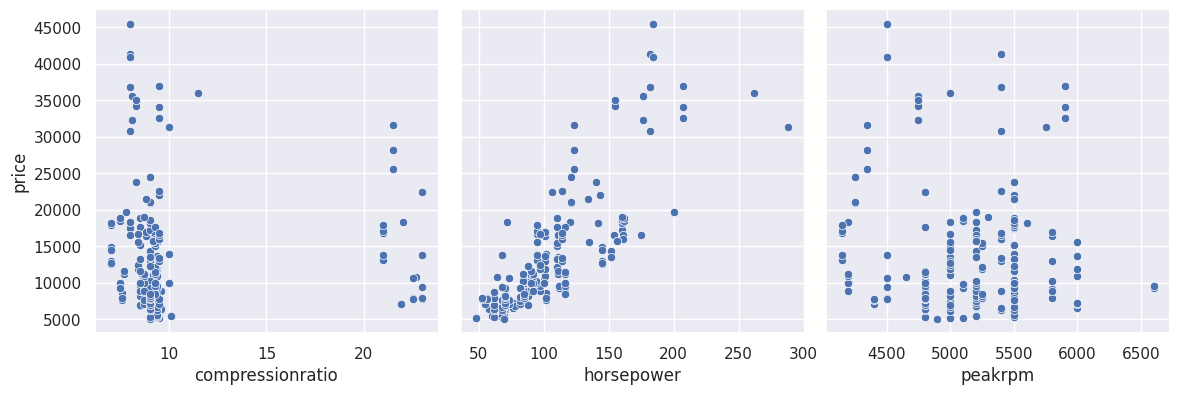

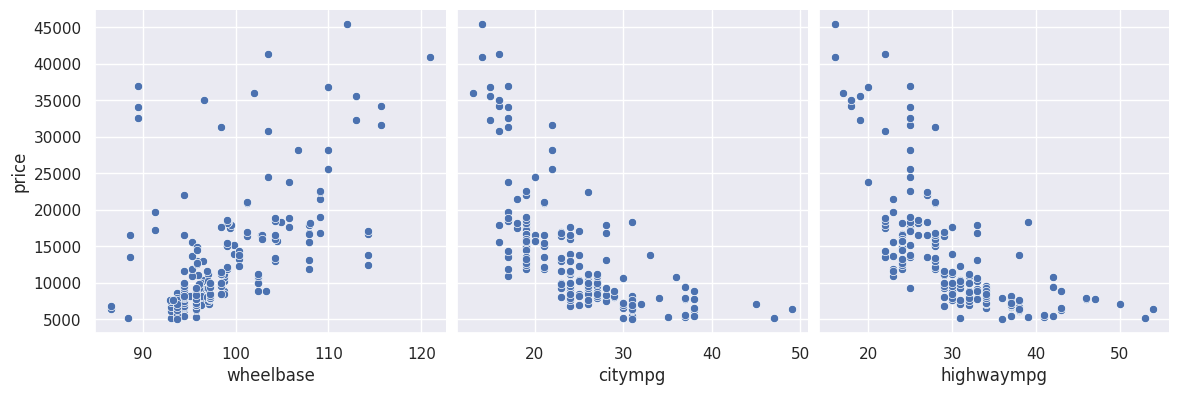

In [60]:
def pp(x,y,z):
    sns.pairplot(cars, x_vars=[x,y,z], y_vars='price',size=4, aspect=1, kind='scatter')
    plt.show()

pp('enginesize', 'boreratio', 'stroke')
pp('compressionratio', 'horsepower', 'peakrpm')
pp('wheelbase', 'citympg', 'highwaympg')

#### Inference :

1. enginesize, boreratio, horsepower, wheelbase - seem to have a significant positive correlation with price.
2. citympg, highwaympg - seem to have a significant negative correlation with price.

In [61]:
np.corrcoef(cars['carlength'], cars['carwidth'])[0, 1]

0.841118268481846

### Step 4 : Deriving new features

In [62]:
#Fuel economy
cars['fueleconomy'] = (0.55 * cars['citympg']) + (0.45 * cars['highwaympg'])

In [63]:
#Binning the Car Companies based on avg prices of each Company.
cars['price'] = cars['price'].astype('int')
temp = cars.copy()
table = temp.groupby(['CompanyName'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='CompanyName')
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
cars['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsrange
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,23.70,Medium
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,23.70,Medium
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,22.15,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,26.70,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,19.80,Medium


### Step 5 : Bivariate Analysis

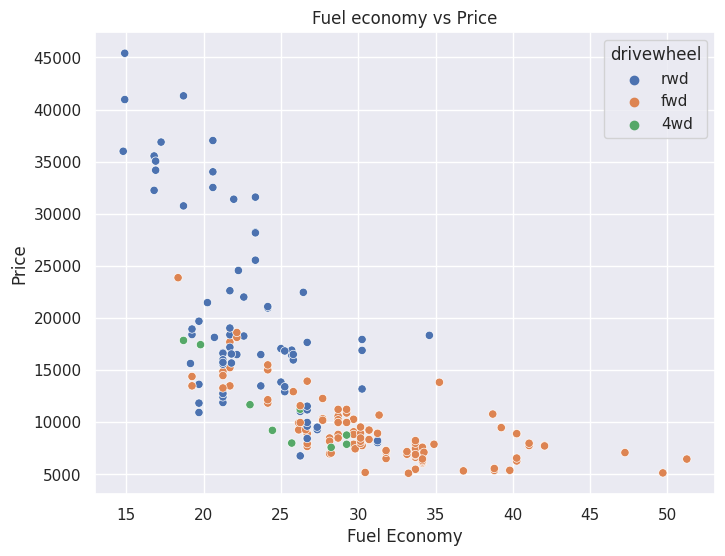

<Figure size 640x480 with 0 Axes>

In [64]:
plt.figure(figsize=(8,6))

plt.title('Fuel economy vs Price')
sns.scatterplot(x=cars['fueleconomy'],y=cars['price'],hue=cars['drivewheel'])
plt.xlabel('Fuel Economy')
plt.ylabel('Price')

plt.show()
plt.tight_layout()

#### Inference :

1.  fueleconomy has an obvios negative correlation with price and is significant.

<Figure size 2500x600 with 0 Axes>

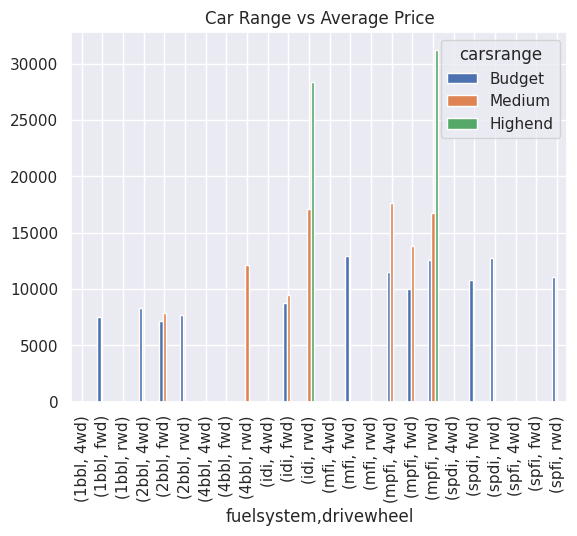

In [65]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(cars.groupby(['fuelsystem','drivewheel','carsrange'])['price'].mean().unstack(fill_value=0))
df.plot.bar()
plt.title('Car Range vs Average Price')
plt.show()

#### Inference :

1. High ranged cars prefer rwd drivewheel with idi or mpfi fuelsystem.

### List of significant variables after Visual analysis :

*   Car Range
*   Engine Type
*   Fuel type
*   Car Body
*   Aspiration
*   Cylinder Number
*   Drivewheel
*   Curbweight


In [66]:
cars_lr = cars[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower',
                    'fueleconomy', 'carlength','carwidth', 'carsrange']]
cars_lr.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,carsrange
0,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
1,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
2,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,22.15,171.2,65.5,Medium
3,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,26.70,176.6,66.2,Medium
4,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,19.80,176.6,66.4,Medium


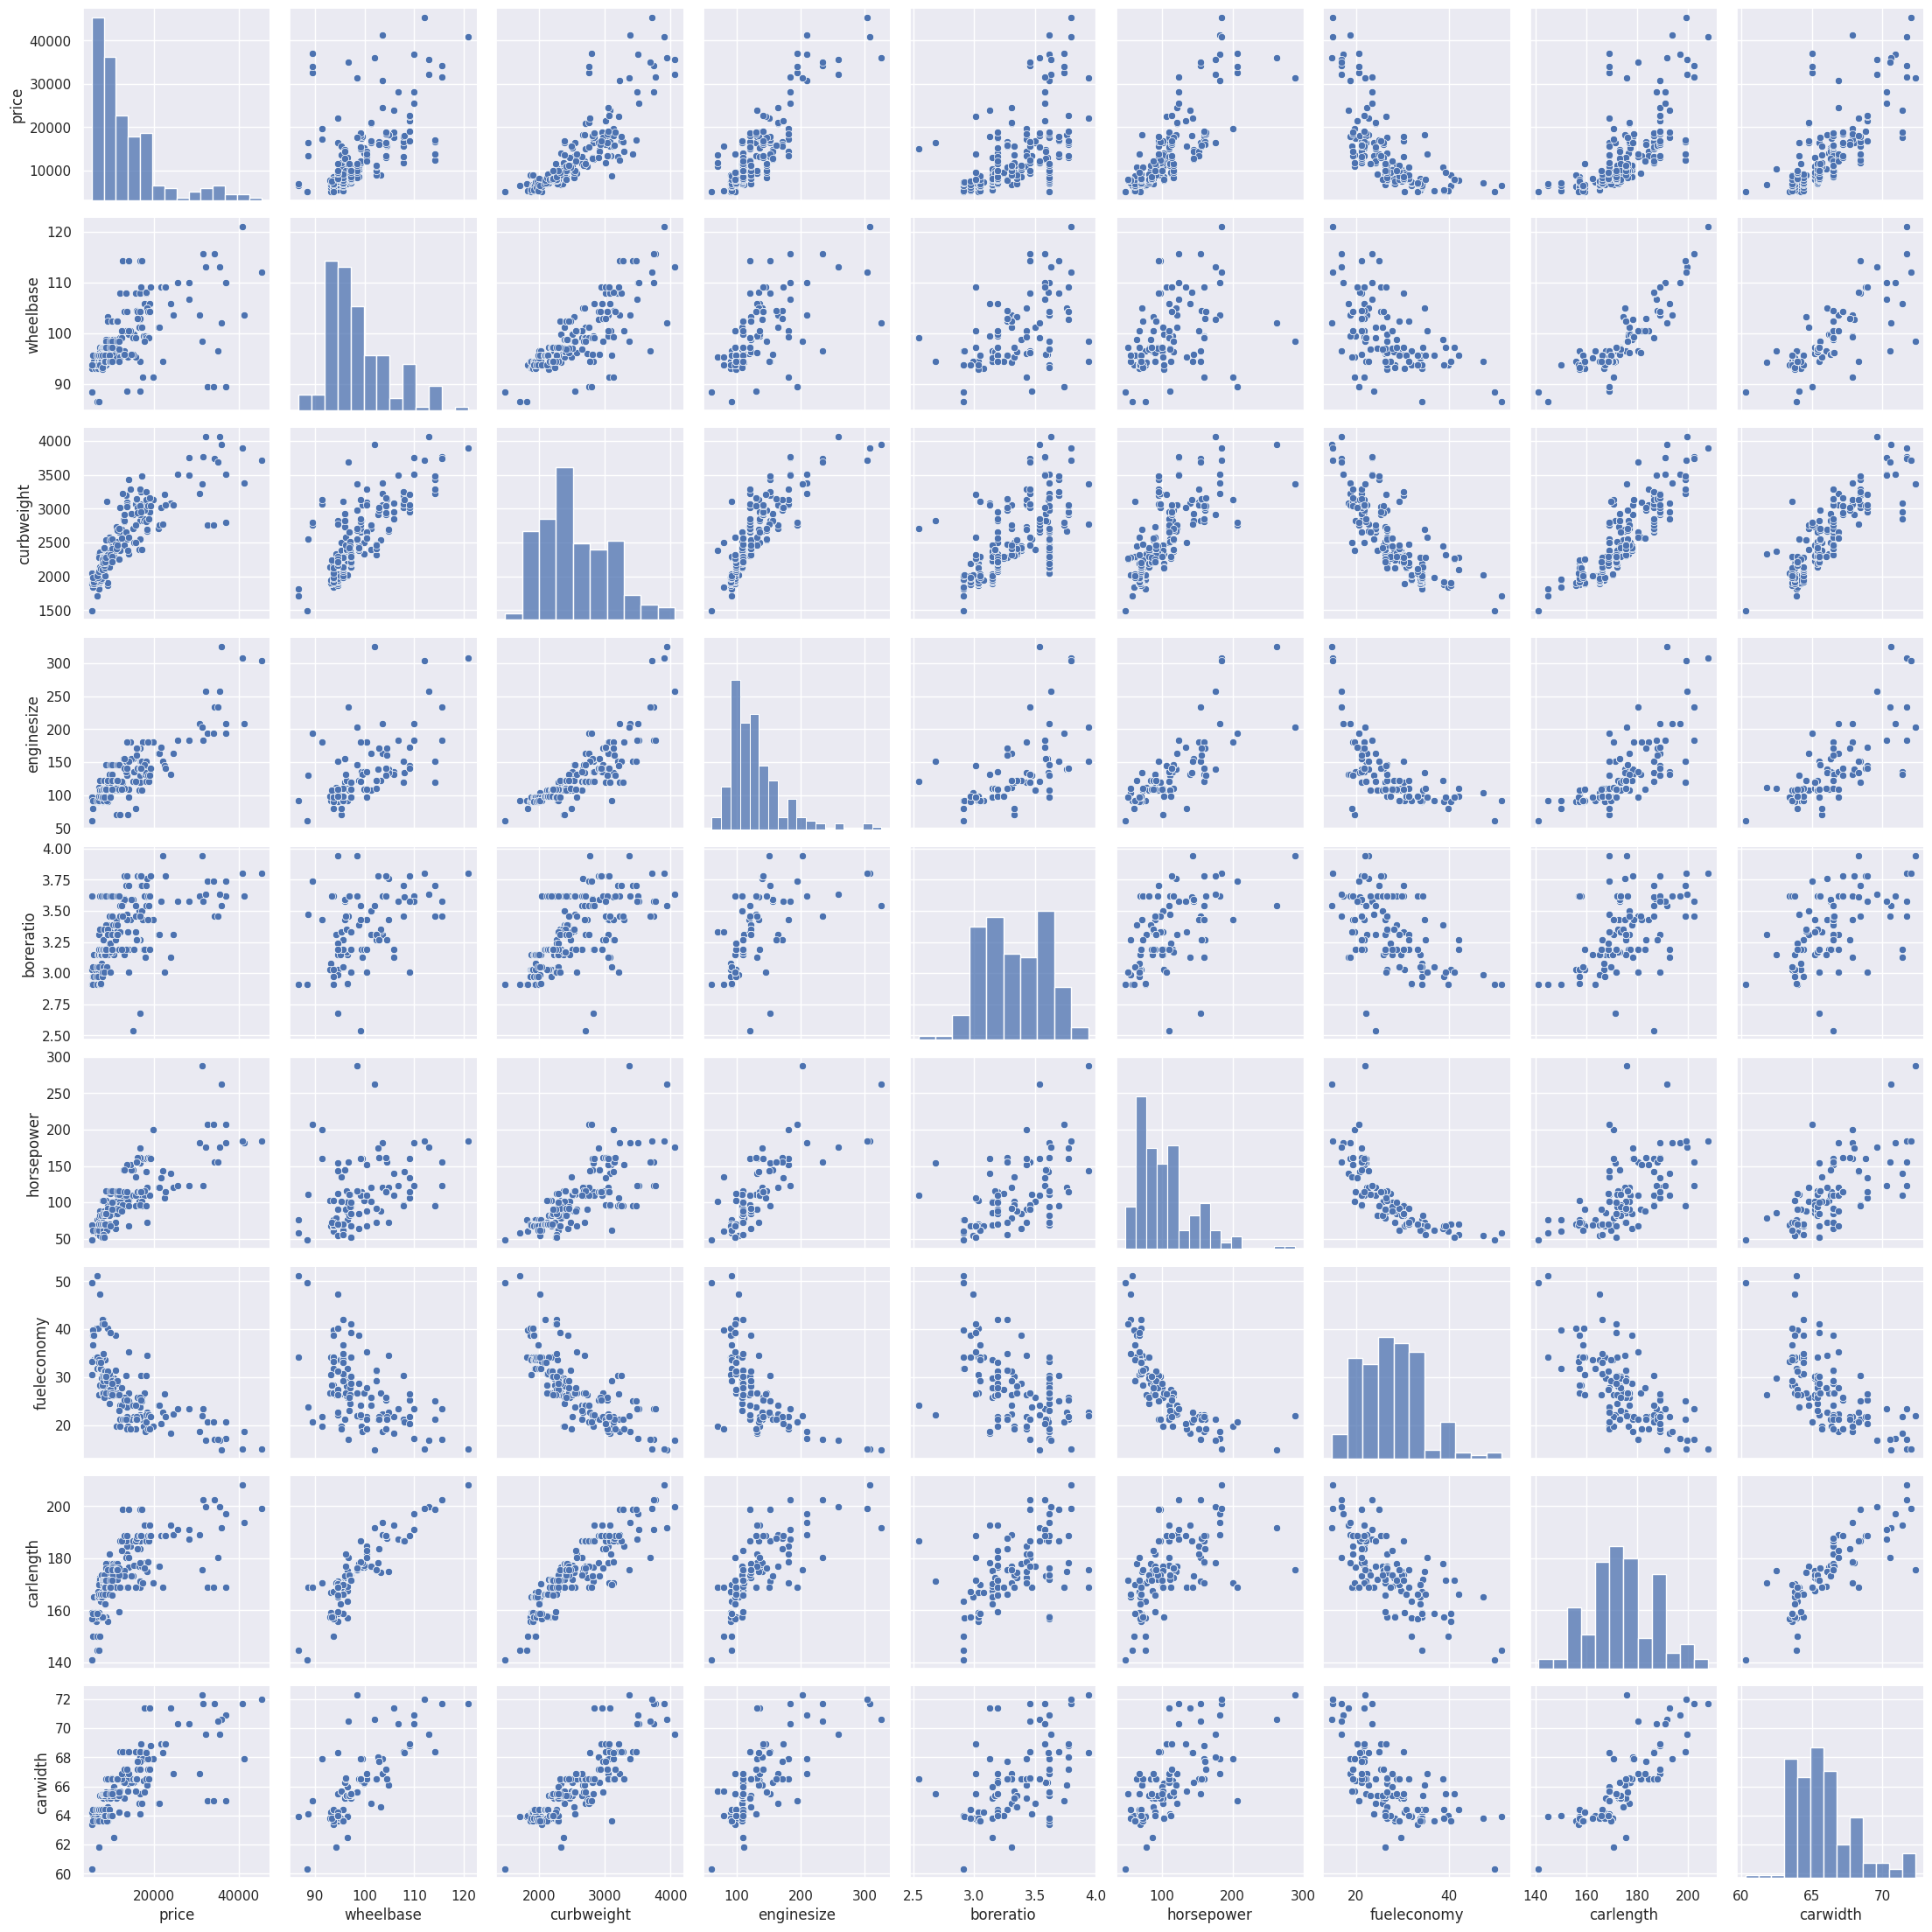

In [67]:
sns.pairplot(cars_lr)
plt.show()

### Step 6 : Dummy Variables

In [68]:
# Defining the map function
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the cars_lr

cars_lr = dummies('fueltype',cars_lr)
cars_lr = dummies('aspiration',cars_lr)
cars_lr = dummies('carbody',cars_lr)
cars_lr = dummies('drivewheel',cars_lr)
cars_lr = dummies('enginetype',cars_lr)
cars_lr = dummies('cylindernumber',cars_lr)
cars_lr = dummies('carsrange',cars_lr)

In [69]:
cars_lr.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
0,13495,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,1,0,0,0,0,1,0
1,16500,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,1,0,0,0,0,1,0
2,16500,94.5,2823,152,2.68,154,22.15,171.2,65.5,1,...,1,0,0,0,1,0,0,0,1,0
3,13950,99.8,2337,109,3.19,102,26.70,176.6,66.2,1,...,0,0,0,1,0,0,0,0,1,0
4,17450,99.4,2824,136,3.19,115,19.80,176.6,66.4,1,...,0,0,1,0,0,0,0,0,1,0


In [70]:
cars_lr.shape

(205, 31)

### Step 7 : Train-Test Split and feature scaling

In [71]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(cars_lr, train_size = 0.7, test_size = 0.3, random_state = 100)

In [72]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [73]:
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
122,0.068818,0.244828,0.272692,0.139623,0.230159,0.083333,0.530864,0.426016,0.291667,1,...,0,0,0,1,0,0,0,0,0,0
125,0.466890,0.272414,0.500388,0.339623,1.000000,0.395833,0.213992,0.452033,0.666667,1,...,0,0,0,1,0,0,0,0,0,1
166,0.122110,0.272414,0.314973,0.139623,0.444444,0.266667,0.344307,0.448780,0.308333,1,...,0,0,0,1,0,0,0,0,0,0
1,0.314446,0.068966,0.411171,0.260377,0.626984,0.262500,0.244170,0.450407,0.316667,1,...,0,0,0,1,0,0,0,0,1,0
199,0.382131,0.610345,0.647401,0.260377,0.746032,0.475000,0.122085,0.775610,0.575000,1,...,0,0,0,1,0,0,0,0,1,0


In [74]:
df_train.describe()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.219309,0.411141,0.407878,0.241351,0.497946,0.227302,0.358265,0.525476,0.461655,0.909091,...,0.062937,0.027972,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.412587,0.118881
std,0.215682,0.205581,0.211269,0.154619,0.207140,0.165511,0.185980,0.204848,0.184517,0.288490,...,0.243703,0.165472,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.494030,0.324786
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067298,0.272414,0.245539,0.135849,0.305556,0.091667,0.198903,0.399187,0.304167,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.140343,0.341379,0.355702,0.184906,0.500000,0.191667,0.344307,0.502439,0.425000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.313479,0.503448,0.559542,0.301887,0.682540,0.283333,0.512346,0.669919,0.550000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


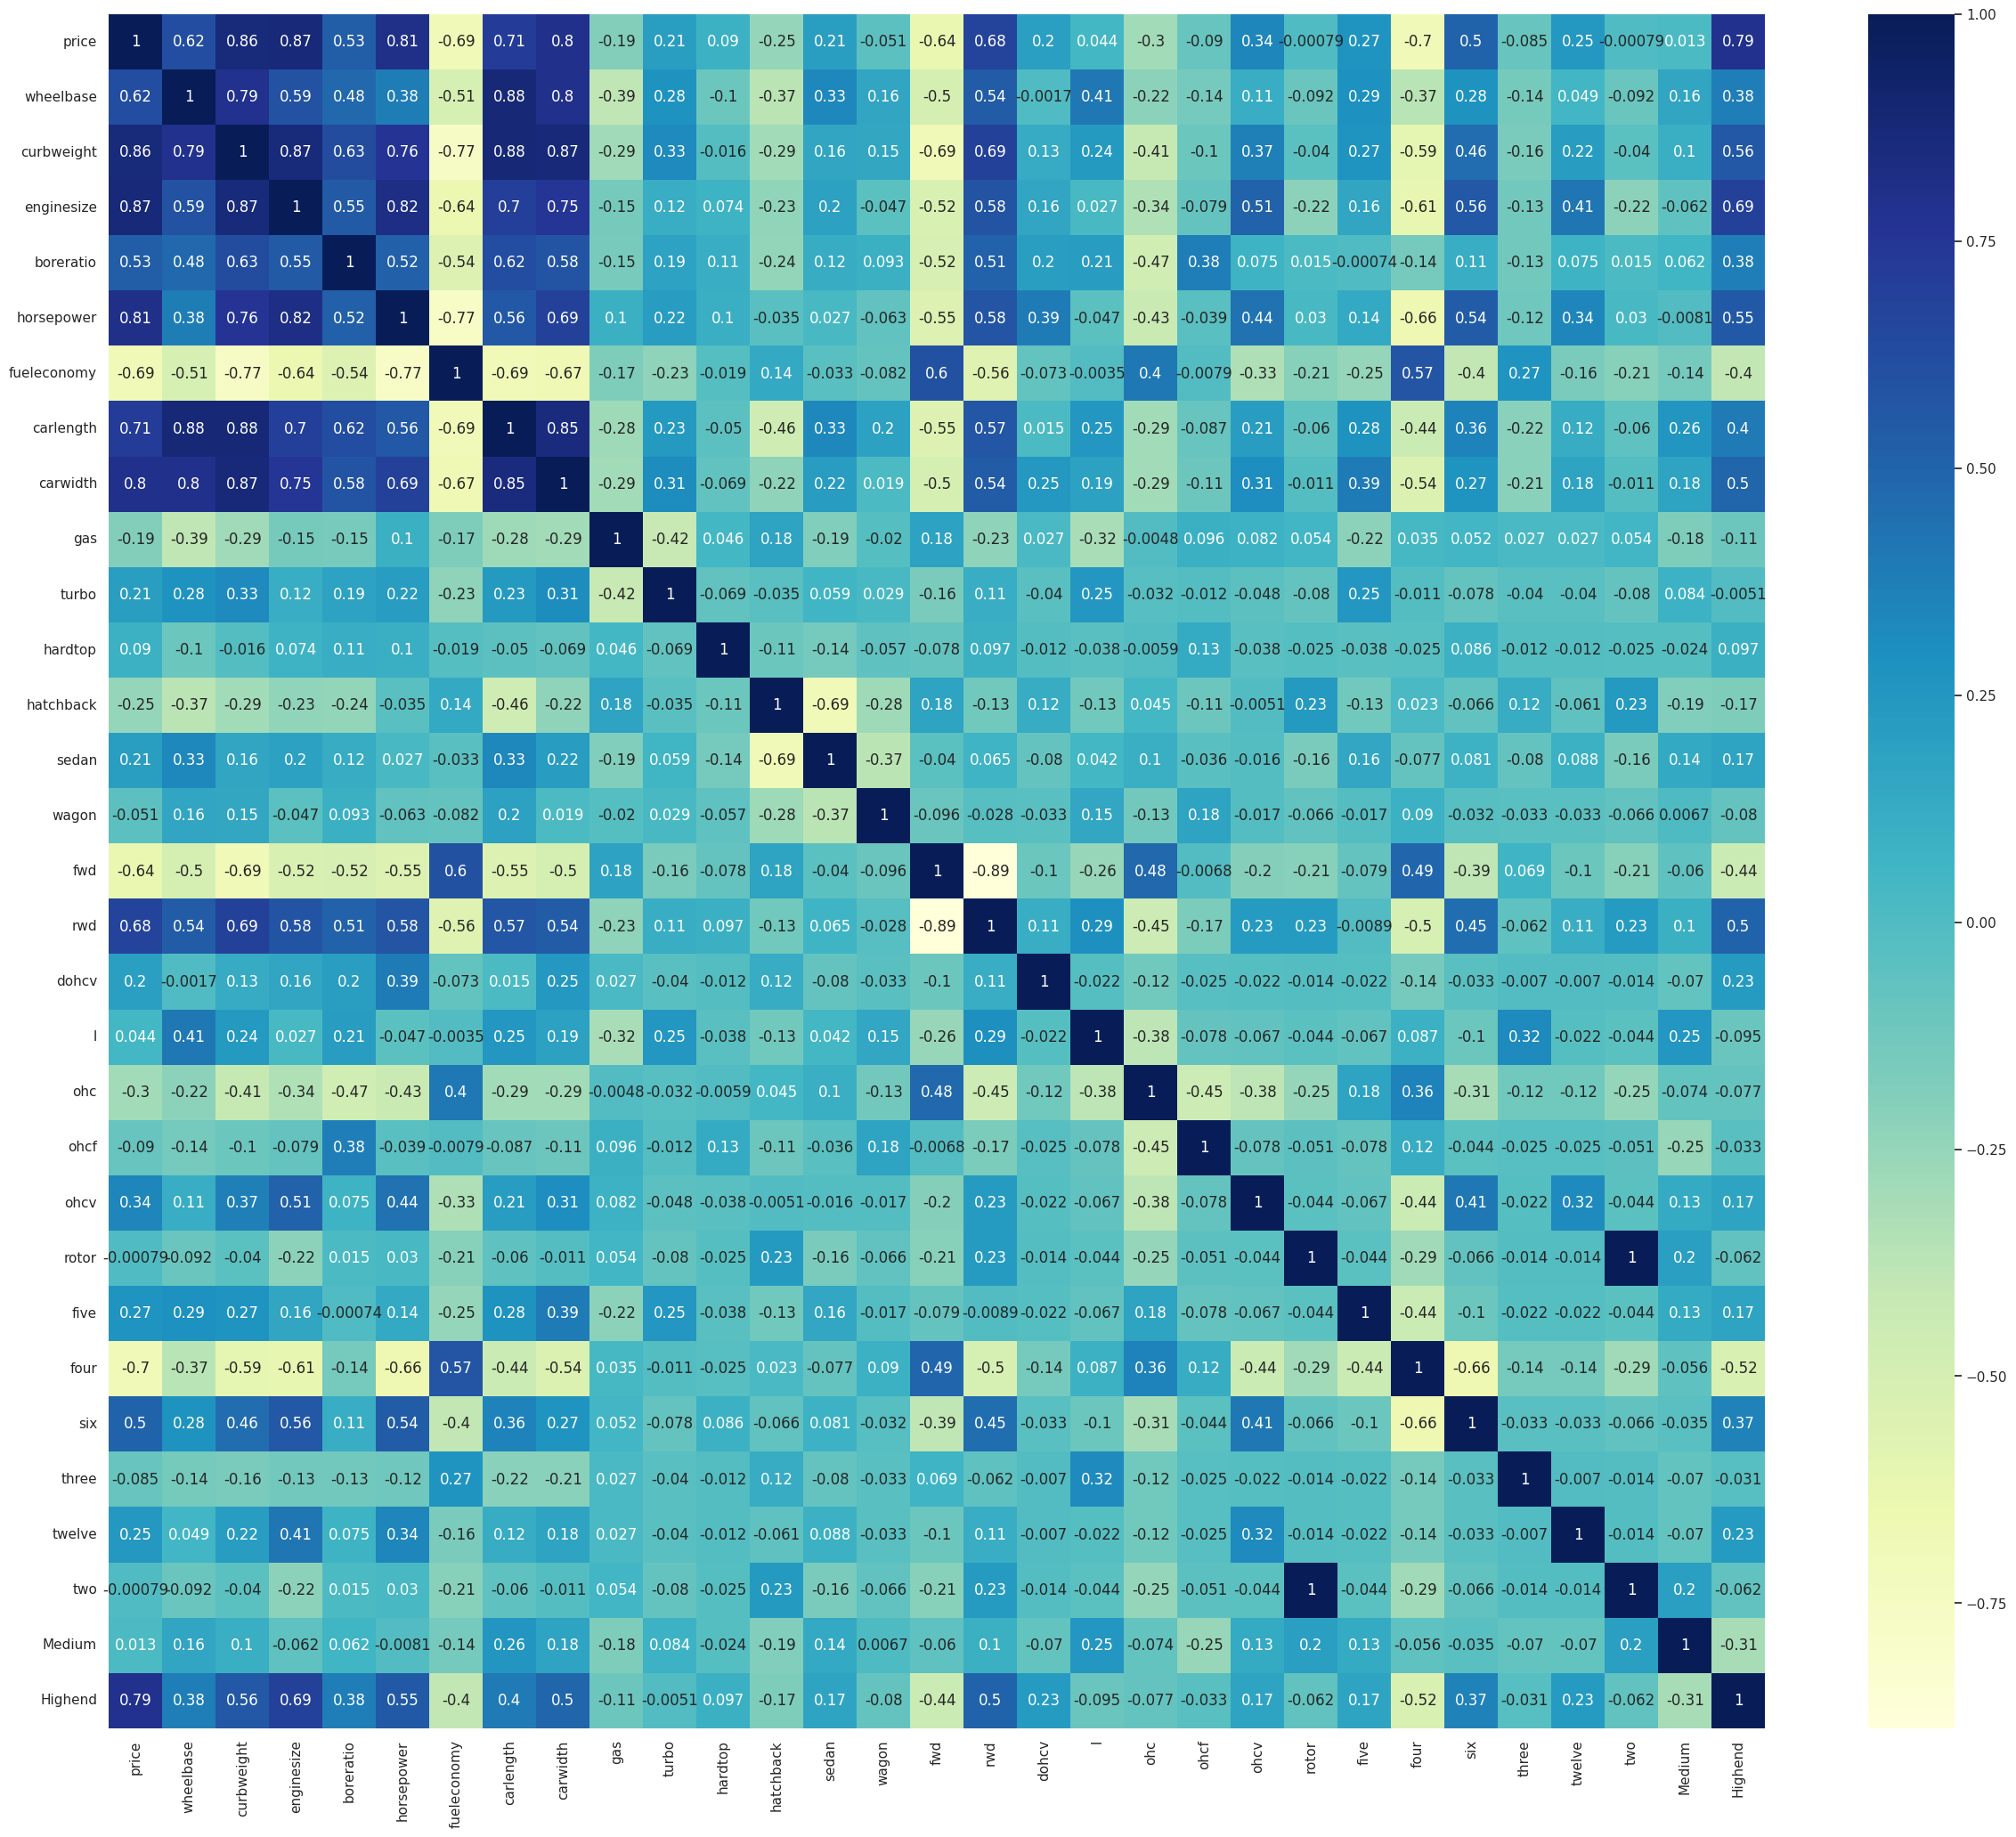

In [75]:
#Correlation using heatmap
plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

Highly correlated variables to price are - curbweight, enginesize, horsepower,carwidth and highend.

In [76]:
#Dividing data into X and y variables
y_train = df_train.pop('price')
X_train = df_train

### Step 8 : Model Building

In [77]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [78]:
lm = LinearRegression()
lm.fit(X_train, y_train)

# Specify the number of features to select and the step
rfe = RFE(estimator=lm, n_features_to_select=10, step=1)

# Fit RFE to your training data
rfe = rfe.fit(X_train, y_train)

In [79]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 3),
 ('curbweight', True, 1),
 ('enginesize', False, 13),
 ('boreratio', False, 10),
 ('horsepower', True, 1),
 ('fueleconomy', True, 1),
 ('carlength', False, 11),
 ('carwidth', True, 1),
 ('gas', False, 17),
 ('turbo', False, 18),
 ('hardtop', False, 2),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 16),
 ('rwd', False, 15),
 ('dohcv', True, 1),
 ('l', False, 19),
 ('ohc', False, 7),
 ('ohcf', False, 8),
 ('ohcv', False, 9),
 ('rotor', False, 21),
 ('five', False, 6),
 ('four', False, 4),
 ('six', False, 5),
 ('three', False, 14),
 ('twelve', True, 1),
 ('two', False, 20),
 ('Medium', False, 12),
 ('Highend', True, 1)]

In [80]:
X_train.columns[rfe.support_]

Index(['curbweight', 'horsepower', 'fueleconomy', 'carwidth', 'hatchback',
       'sedan', 'wagon', 'dohcv', 'twelve', 'Highend'],
      dtype='object')

#### Building model using statsmodel, for the detailed statistics

In [81]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,curbweight,horsepower,fueleconomy,carwidth,hatchback,sedan,wagon,dohcv,twelve,Highend
122,0.272692,0.083333,0.530864,0.291667,0,1,0,0,0,0
125,0.500388,0.395833,0.213992,0.666667,1,0,0,0,0,1
166,0.314973,0.266667,0.344307,0.308333,1,0,0,0,0,0
1,0.411171,0.262500,0.244170,0.316667,0,0,0,0,0,0
199,0.647401,0.475000,0.122085,0.575000,0,0,1,0,0,0


In [82]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X

def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

#### MODEL 1

In [83]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     172.1
Date:                Tue, 03 Oct 2023   Prob (F-statistic):           1.29e-70
Time:                        03:23:05   Log-Likelihood:                 205.85
No. Observations:                 143   AIC:                            -389.7
Df Residuals:                     132   BIC:                            -357.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0947      0.042     -2.243      

p-vale of twelve seems to be higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables.

In [84]:
X_train_new = X_train_rfe.drop(["twelve"], axis = 1)

#### MODEL 2

In [85]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     187.9
Date:                Tue, 03 Oct 2023   Prob (F-statistic):           4.25e-71
Time:                        03:23:05   Log-Likelihood:                 204.17
No. Observations:                 143   AIC:                            -388.3
Df Residuals:                     133   BIC:                            -358.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0764      0.041     -1.851      

In [86]:
X_train_new = X_train_new.drop(["fueleconomy"], axis = 1)

#### MODEL 3

In [87]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     209.5
Date:                Tue, 03 Oct 2023   Prob (F-statistic):           7.85e-72
Time:                        03:23:05   Log-Likelihood:                 203.07
No. Observations:                 143   AIC:                            -388.1
Df Residuals:                     134   BIC:                            -361.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0305      0.026     -1.165      0.2

In [88]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
0,const,26.90
1,curbweight,8.10
5,sedan,6.07
4,hatchback,5.63
3,carwidth,5.14
2,horsepower,3.61
6,wagon,3.58
8,Highend,1.63
7,dohcv,1.46


dropping curbweight because of high VIF value. (shows that curbweight has high multicollinearity.)

In [89]:
X_train_new = X_train_new.drop(["curbweight"], axis = 1)

### Step 9 : Residual Analysis of Model

In [90]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

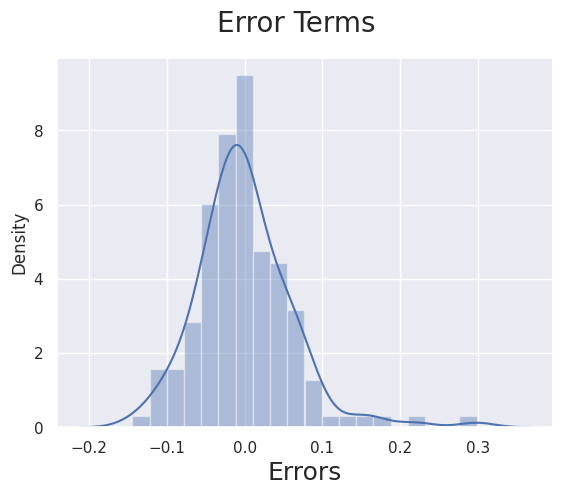

In [91]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)

Error terms seem to be approximately normally distributed, so the assumption on the linear modeling seems to be fulfilled.

### Step 10 : Prediction and Evaluation

In [92]:
#Scaling the test set
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])


In [93]:
#Dividing into X and y
y_test = df_test.pop('price')
X_test = df_test

In [94]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable
X_test_new = sm.add_constant(X_test_new)

In [95]:
# Making predictions
y_pred = lm.predict(X_test_new)

#### Evaluation of test via comparison of y_pred and y_test

In [96]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8048114037914783

Text(0, 0.5, 'y_pred')

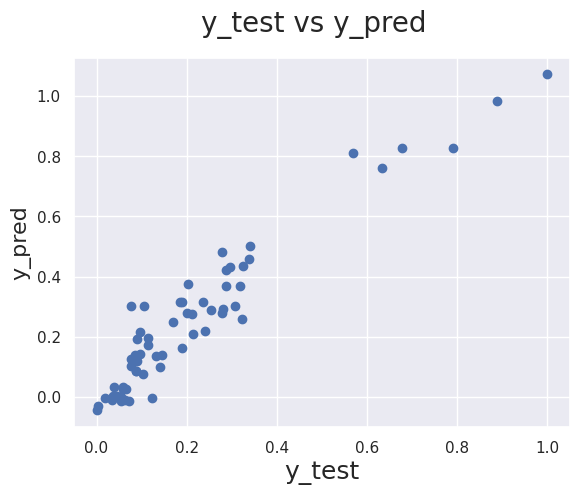

In [97]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)

#### Evaluation of the model using Statistics

In [98]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     215.9
Date:                Tue, 03 Oct 2023   Prob (F-statistic):           4.70e-70
Time:                        03:23:06   Log-Likelihood:                 195.77
No. Observations:                 143   AIC:                            -375.5
Df Residuals:                     135   BIC:                            -351.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0319      0.027     -1.161      0.2

#### Inference :

1. *R-sqaured and Adjusted R-squared (extent of fit)* - 0.899 and 0.896 - 90% variance explained.
2. *F-stats and Prob(F-stats) (overall model fit)* - 308.0 and 1.04e-67(approx. 0.0) - Model fir is significant and explained 90% variance is just not by chance.
3. *p-values* - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the predictors are statistically significant.

# **CONCLUSION**

Throughout this process, we recognized the vital role that feature scaling plays in enhancing model performance, interpretability, and convergence.

To address this issue, we introduced the concept of feature scaling, which aims to normalize or standardize the data's numerical attributes. We explored three fundamental techniques for feature scaling:

Min-Max Scaling: This method rescales features to a specific range, usually between 0 and 1. Min-Max scaling proved beneficial for algorithms that rely on distance metrics or gradient-based optimization, such as k-Nearest Neighbors and Support Vector Machines.

Standardization (Z-Score Scaling): Standardization transforms features to have a mean of 0 and a standard deviation of 1. It is particularly effective for models that assume normally distributed data, such as Logistic Regression and Gaussian Naive Bayes.

Normalization: Normalization scales features to a unit norm, making them suitable for algorithms that emphasize the direction or angle between data points, such as Principal Component Analysis (PCA) and neural networks.

By applying these feature scaling techniques to our dataset, we observed remarkable improvements in model performance. Algorithms converged faster, and the overall accuracy and predictive power of our models significantly increased.

# **WORKED EXAMPLE 2:**

To start with, let's import all the required libraries.
A library is a collection of pre-written code that you can use to do specific tasks. It's like a toolbox full of tools that you can use to make your work easier. Python has many libraries that you can use for different purposes, such as:

NumPy: A library for working with arrays and mathematical operations.

Pandas: A library for working with data frames and manipulating data.

Matplotlib: A library for creating visualizations and graphs.

Scikit-learn: A library for machine learning tasks, like classification and regression.

In [99]:
!pip install shap

In [100]:
!pip install eli5

In [101]:
!pip install imblearn

In [102]:
!pip install mlxtend==0.18.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 7.5 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.22.0
    Uninstalling mlxtend-0.22.0:
      Successfully uninstalled mlxtend-0.22.0


In [103]:
!pip install lime

In [104]:
# libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec

# Success metrics for the models
from sklearn.metrics import accuracy_score,precision_score,recall_score, confusion_matrix,f1_score
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

from sklearn.svm import LinearSVC
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.feature_selection import SelectFromModel

#Feature Importance Libraries
import shap
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.inspection import permutation_importance
import lime
import lime.lime_tabular
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder

#Algorithms for using supervised learning methods
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import ComplementNB

import warnings # filtering the future warnings
warnings.filterwarnings('ignore')

sns.set()

## Creating DataFrame & Data Understanding

In [105]:
df = pd.read_csv('https://raw.githubusercontent.com/nikbearbrown/INFO_7390_Art_and_Science_of_Data/main/CSV/healthcare-dataset-stroke-data%20(1).csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [106]:
# Check shape of dataframe - 5110 rows and 12 columns
df.shape

(5110, 12)

It's important to know what kind of data we are storing.

The number of rows and columns in the dataset

The name and data type of each column in the dataset

The number of non-missing values in each column

***This information can be useful for understanding the overall structure of the dataset and for identifying any potential issues, such as missing data or columns with inconsistent data types.***

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [108]:
 df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [109]:
#checking if the any data is missing
df.isnull().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

Now that we got details about our data, let's think about our outcome again, we want to predict stroke prediction, Now to predict this, ***there are variable which will help us derive the outcome but will all the variable have equal role to help predict the outcome***?

Now that we have obtained details about our data, let's think about our desired outcome: predicting stroke. When making such a prediction, not all variables may contribute equally to the outcome. Therefore, we need to consider whether all variables have an equal role in helping us make our prediction.

To understabd this, we will do Data preproceessinng**feature engineering**

Feature engineering allows us to extract new and useful information from the data we have, which can help us build better machine learning models.

Feature engineering helps us to fill in the gaps in our data and find patterns or relationships that might not be immediately apparent.

## Data Preprocessing - Feature Engineering - Exploratory Data Analysis

In [110]:
df.duplicated().any() # There is no duplicated features to be dropped or deal with.

False

In [111]:
df.isnull().any() # There are missing values to deal with

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

### ***As we can see there are missing values, now what can we do for this? Why is handling missing values necessary?***

If we don't handle these missing pieces of information, it can be like trying to solve the puzzle with missing pieces - we might not get the full picture and our conclusions might be wrong.

Similarly, if we don't handle missing information in a dataset, our analysis might be wrong and our conclusions might be incorrect. This can lead to bad decisions and problems down the line.

So to handle missing values, I've decided to fill the missing values with mean values.

Why mean values?
Again to keep our data normalized

In [112]:

  #MR
  percent_missing = round(df.isnull().sum() * 100 / len(df),3)
  missing_value_df = pd.DataFrame({'Missing_Percentage': percent_missing})
  missing_value_df.sort_values(by="Missing_Percentage",ascending=False).head(5)

  # bmi feature contains missing values which is just 3.9% of the dataset.
  # Filling with median for missing values technique will be used.

,Missing_Percentage
bmi,3.933
id,0.000
gender,0.000
age,0.000
hypertension,0.000


In [113]:
df["bmi"]=df['bmi'].fillna(df.median().iloc[0]) #Filling the missing values with median

In [114]:

df.isnull().values.any() # No more missing values.

False

### Dropping Unnecessary Features
*  id feature will be dropped because it just contains unique id values.

In [115]:
 #dropping "Id" feature from the dataset.
df.drop(["id"], axis=1, inplace=True)

## **Categorical Features' Analysis**

***How Categorical Feature Analysis will help?***

We need to analyze categorical features in a dataset because they can have a significant impact on the target variable. Categorical features are variables that have a limited number of values, such as gender (male or female), marital status (married or single).

By analyzing the relationship between these features and the target variable, we can gain insights into which variables are most important in predicting the outcome. This analysis can also help us to identify any correlations or dependencies between different variables, which can be useful in feature engineering and model building.

For example, in a stroke dataset, we may want to analyze the relationship between smoking status and the incidence of stroke. By examining the number of strokes among smokers and non-smokers, we can gain insight into the impact of smoking on stroke risk. Similarly, we may want to analyze the relationship between gender and stroke risk, or between hypertension and stroke risk. By analyzing these relationships, we can better understand the factors that contribute to stroke risk and develop more accurate predictive models.

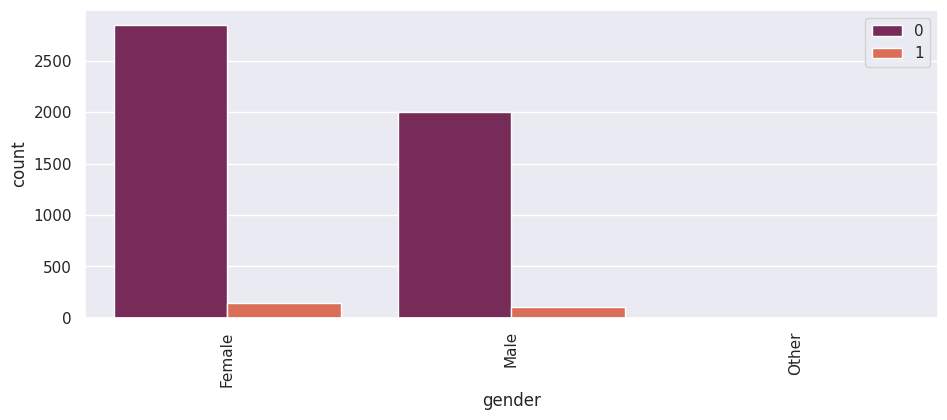

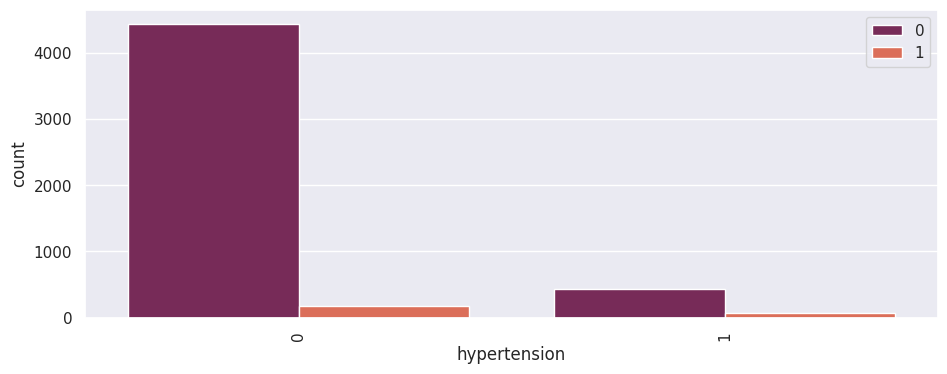

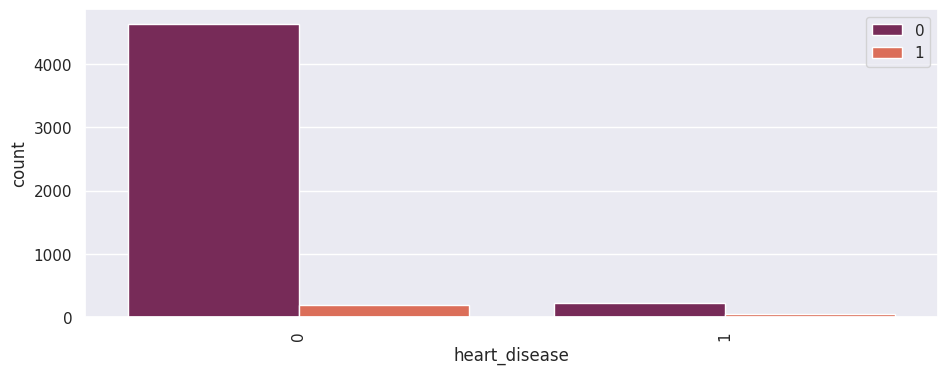

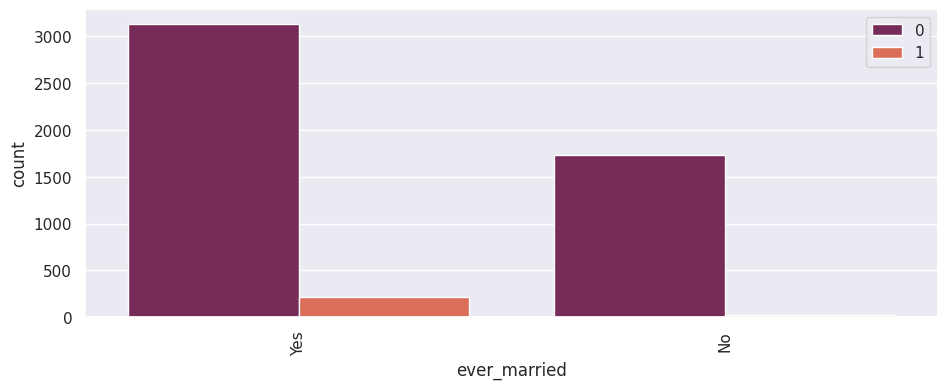

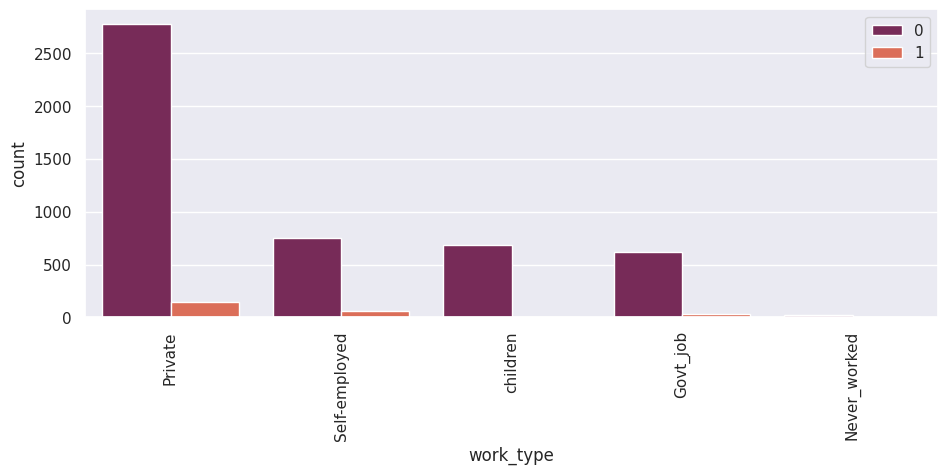

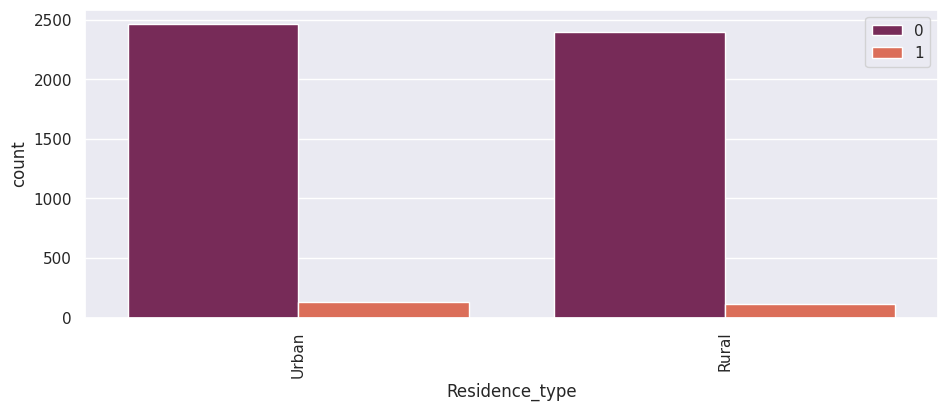

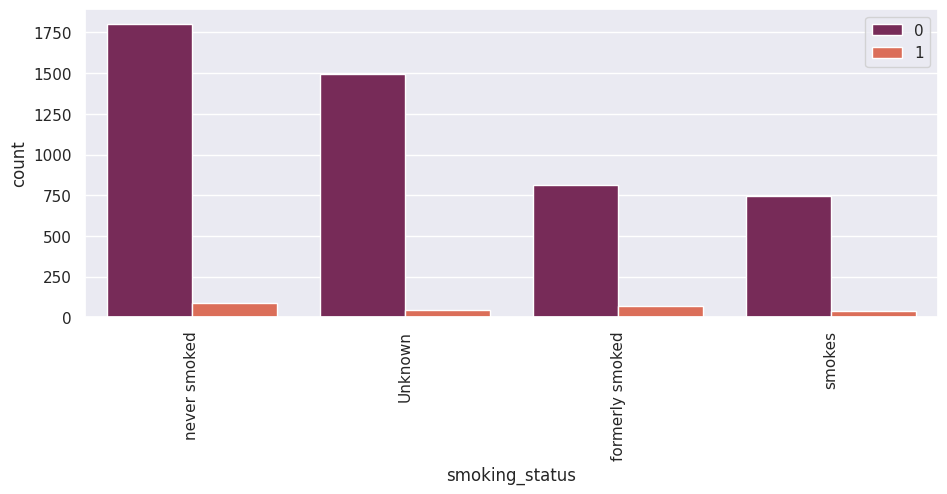

In [116]:
cat_variables = ["gender","hypertension","heart_disease",'ever_married','work_type','Residence_type','smoking_status']
for i in cat_variables:
    fig_dims = (11, 4)
    fig, ax = plt.subplots(figsize=fig_dims)
    sns.countplot(x=i, hue="stroke", ax=ax, data=df,palette="rocket",order=df[i].value_counts().index)
    plt.xticks(rotation=90)
    plt.legend(loc='upper right')
    plt.show()

The two bars in each group represent the number of individuals who had a stroke and the number of individuals who did not have a stroke in each category of the categorical variable. For example, in the "gender" graph, the purple bar represents the number of males who did not have a stroke, while the orange bar represents the number of males who had a stroke. Similarly, the purple bar in the "ever_married" graph represents the number of individuals who did not have a stroke and were married, while the orange bar represents the number of individuals who had a stroke and were married.

From this graph, we can conclude that certain categories such as hypertension, heart disease, and smoking status appear to have a higher rate of stroke cases compared to other categories. However, to draw more definitive conclusions, further analysis may be necessary.





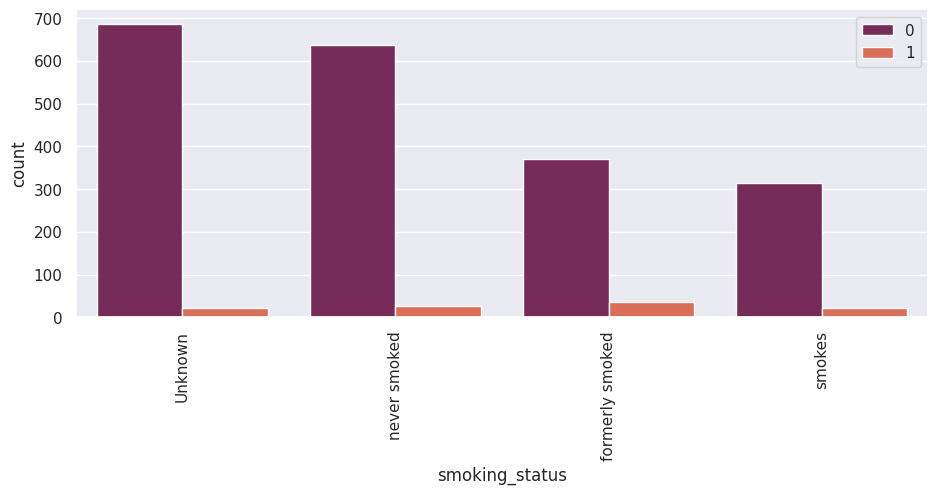

In [117]:
fig_dims = (11, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x="smoking_status", hue="stroke", ax=ax, data=df[df['gender']=='Male'], palette="rocket", order=df[df['gender']=='Male']['smoking_status'].value_counts().index)
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.show()

There is a slight change in this graph, here ***I wanted to examine the data based on gender***.  For instance, males who were former smokers had a stroke rate that was comparatively higher than those who never smoked or currently smokes.

### **Correlation Matrix For Numeric Features**

### ***Why is it important for us know the relation between variables?***

It is important to know the relationship between variables because it can help us understand how different factors are related to each other. For example, if we find a strong positive correlation between age and the occurrence of stroke in our dataset, we can infer that age may be a risk factor for stroke. This information can help doctors and researchers better understand the causes and risk factors of the disease, and potentially develop more effective prevention and treatment strategies. Similarly, if we find a negative correlation between BMI and stroke, it may suggest that maintaining a healthy weight could be protective against the disease. Overall, understanding the relationships between variables can help us gain insights and make better decisions.

This can be shown using a correlation matrix

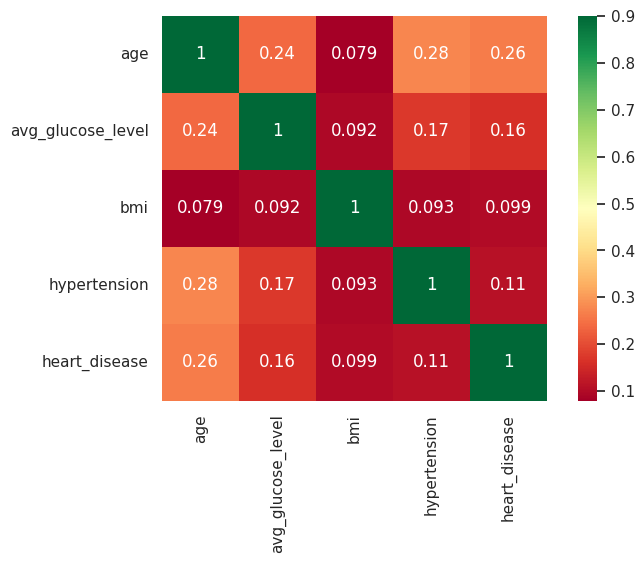

In [118]:
corrmat = df[['age','avg_glucose_level','bmi','hypertension','heart_disease']].corr()
plt.subplots(figsize=(8,5))
sns.heatmap(corrmat, annot=True, vmax=0.9, square=True,cmap='RdYlGn')
plt.show();

A correlation matrix shows the relationship between different variables in a dataset. The matrix is a table with each variable compared to every other variable, where each cell shows the correlation coefficient between the two variables being compared.


The correlation matrix is showing the correlation coefficients between the variables 'age', 'avg_glucose_level', 'bmi', 'hypertension', and 'heart_disease'. The heatmap shows the correlation coefficients graphically, with positive correlations shown in green and negative correlations shown in red. The darker the color, the stronger the correlation. The values in the cells represent the correlation coefficient between the two variables being compared.

By analyzing the correlation matrix, we can see how strongly different variables are related to each other, and we can use this information to make predictions or to better understand the relationships between variables in our dataset.

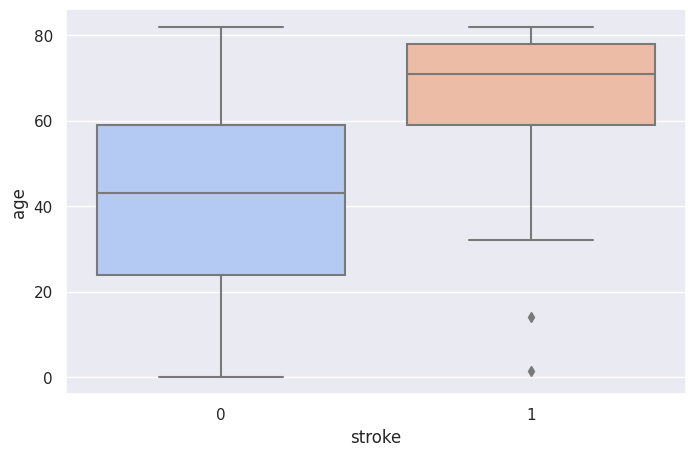

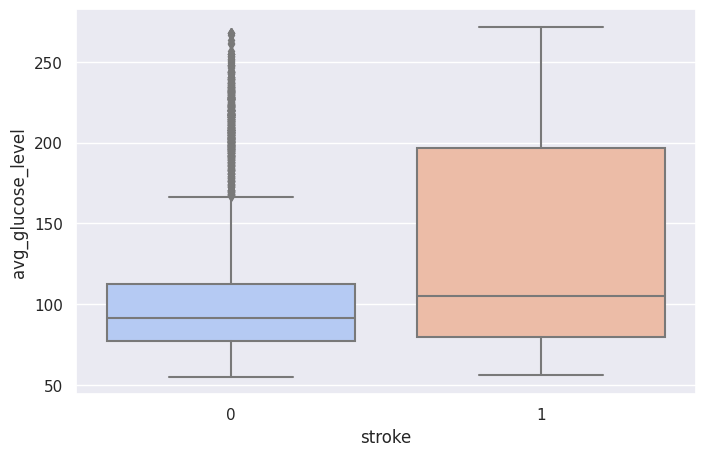

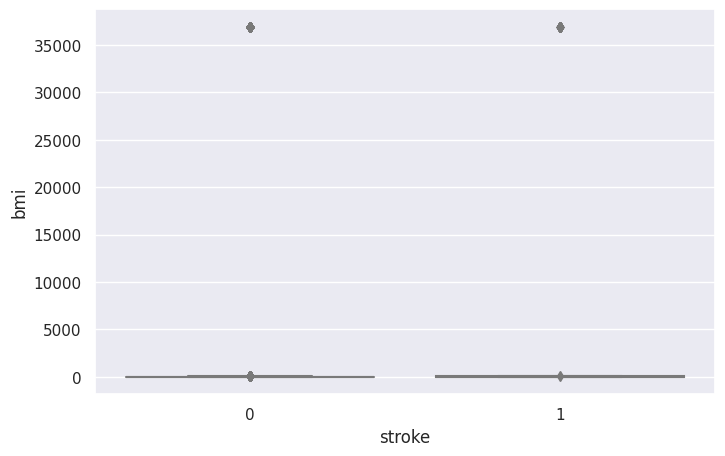

In [119]:
def boxplot(x):
    plt.figure(figsize=(8,5))
    sns.boxplot(data=df, x="stroke",y=df[x],palette="coolwarm")
    plt.show()


feature_list = ['age','avg_glucose_level','bmi']
for i in feature_list:
    boxplot(i)

When the box plot is created for a given feature and the stroke status, we can see how the distribution of the feature differs between those who had a stroke (stroke=1) and those who did not have a stroke (stroke=0). For example, if we look at the age feature, we can see that the median age is slightly higher for those who had a stroke (around 70) compared to those who did not have a stroke (around 45-50). This suggests that age may be a risk factor for stroke. Similarly, we can analyze the box plot for the other features to gain insights into how they may be related to stroke risk. Similarly, if we see that the average glucose level is higher for instances where stroke=1, we might conclude that high glucose levels are also a risk factor for stroke.

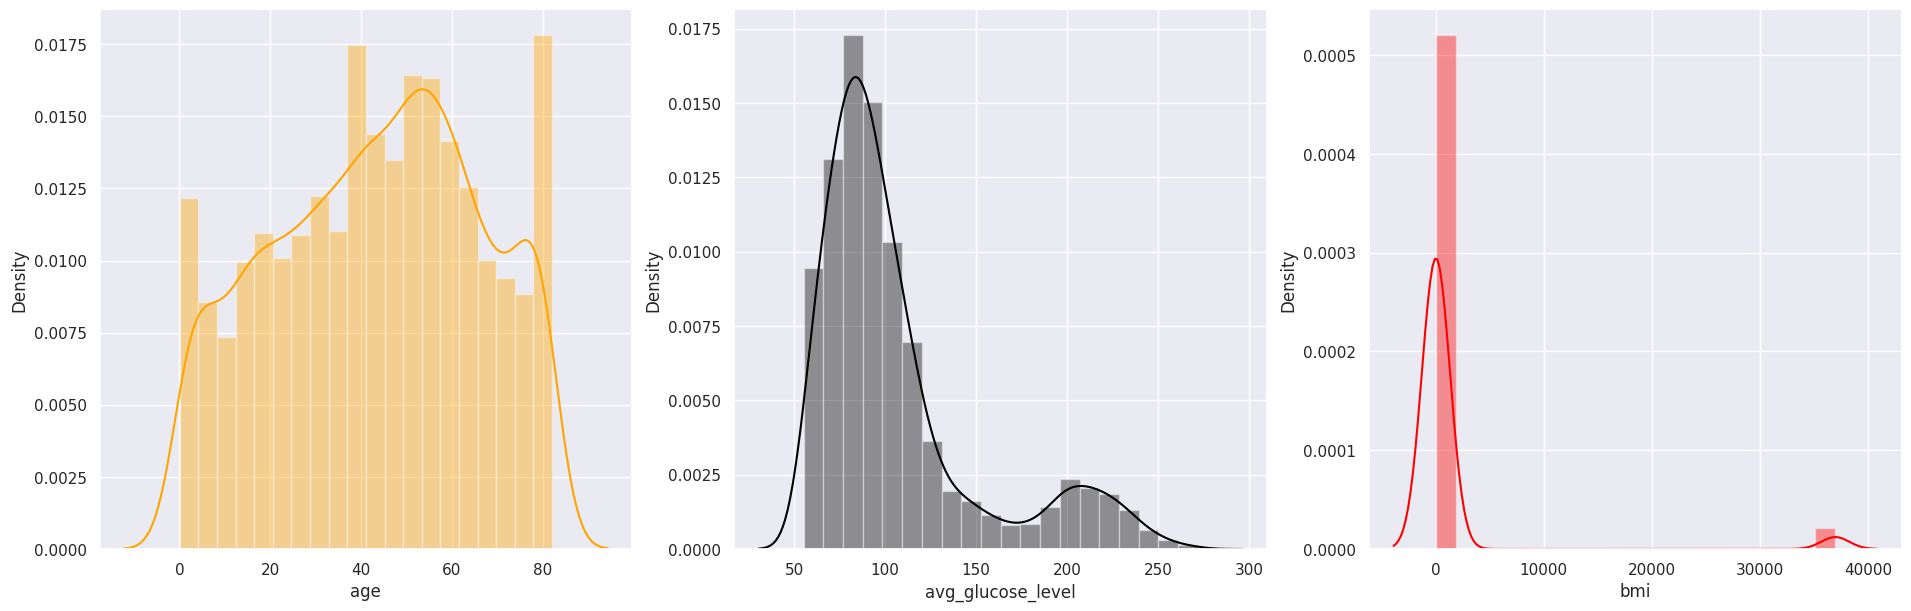

In [120]:
f,ax=plt.subplots(1,3,figsize=(19,6),constrained_layout = True, squeeze=False)
sns.distplot(df["age"],bins=20,ax=ax[0,0],color='orange');

sns.distplot(df["avg_glucose_level"],bins=20,ax=ax[0,1],color='black');

sns.distplot(df["bmi"],bins=20,ax=ax[0,2],color='red');

Each of the three plots is similar in appearance, with a horizontal axis representing the range of values we're looking at (for example, age from 0 to 100), and a vertical axis representing the number of people in our dataset who have a particular value within that range.

The color of the plot represents which feature we're looking at - for example, the plot with the yellow color is showing the distribution of age in our dataset, while the plot with the black color is showing the distribution of average glucose level.

The shape of the plot tells us something about the distribution of values for that feature - for example, if the plot is tall and skinny, that means that most people in our dataset have values that are close to each other, while if the plot is flatter and more spread out, that means that people in our dataset have a wider range of values for that feature.

The plot for age is showing the distribution of ages of the people in the dataset. The x-axis shows the age values, while the y-axis shows how frequent each age value occurs in the dataset. The curve represents the distribution of the age values. From this plot, we can see that the majority of people in the dataset are between the ages of 40 and 70, with the most frequent age being around 50. The plot also shows that there are a few people who are above the age of 80. Overall, this plot gives us an idea of the age distribution in the dataset.

Overall, these plots can help us understand more about the data we're working with and how it's distributed, which can be useful for many different kinds of analysis.

### Analysis of 'stroke' Feature

*   In the case of the healthcare dataset for stroke prediction, we can observe that out of the total 5,100 instances, only 249 belong to the positive class (i.e., having a stroke), while the remaining 4,861 belong to the negative class (i.e., not having a stroke). This shows that the dataset is highly imbalanced as the number of instances in the positive class is significantly lower than the number of instances in the negative class.
* The class label is highly unbalanced. Dealing with unbalanced class label techniques like SMOTE must be applied.

0    4861
1     249
Name: stroke, dtype: int64


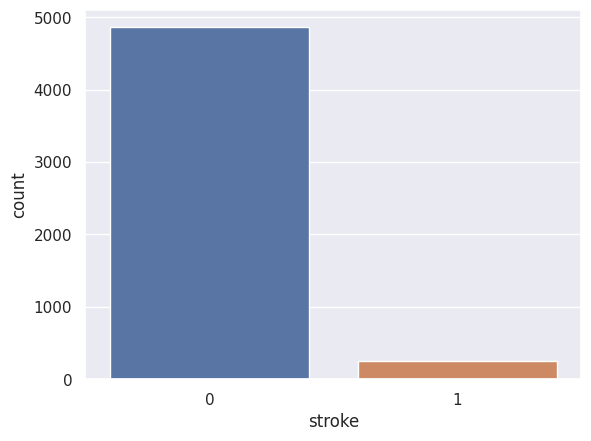

In [121]:
sns.countplot(data=df, x='stroke');
print(df.stroke.value_counts())

## **Why we need to do Feature Engineering?**

We need feature engineering because sometimes the data we have might not have all the information we need to make accurate predictions or decisions. Feature engineering allows us to extract new and useful information from the data we have, which can help us build better machine learning models.

Think of it like making a puzzle. Sometimes you might be missing a few pieces, but if you use your imagination and creativity, you can still complete the puzzle. In the same way, feature engineering helps us to fill in the gaps in our data and find patterns or relationships that might not be immediately apparent.

By creating new features, we can help the machine learning algorithms better understand the underlying patterns and relationships in the data, which in turn can lead to more accurate predictions and better decision-making.

## Feature Engineering for "work_type" Feature

In [122]:
df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [123]:
df["work_type"] = np.where(df["work_type"].str.contains("children|Never_worked"),'Have_No_Works',df["work_type"])
# grouping children and Never_worked rows with "Have_No_Works".

In this case, the condition is that the "work_type" column contains the words "children" or "Never_worked". If this condition is true, the corresponding value in the "work_type" column will be replaced with the string "Have_No_Works". If the condition is false, the original value in the "work_type" column will be kept.

The purpose of this code is to group the rows in the "work_type" column that correspond to children and individuals who have never worked into a single group, which is named "Have_No_Works". This can be helpful for further analysis of the data where we want to group individuals based on their work status.

In [124]:
df['work_type'].value_counts()

Private          2925
Self-employed     819
Have_No_Works     709
Govt_job          657
Name: work_type, dtype: int64

## Feature Engineering for "gender" Feature

In [125]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [126]:
df = df[(df["gender"] == "Female") | (df["gender"] =="Male")]

Now, summary statistics can help us to understand the overall patterns and characteristics of the data, such as the range of values, the distribution of values, and any potential outliers or unusual patterns.

One way to read if the data is properly distributed/normalized or not, we can compare the value of **mean** and **50%** of that column, if they have very minute difference, they are likely to be distributed normally, but if the difference is alot, it means they are not normally distributed.

###***So why we need normalized dataset?***

We need a normalized dataset in machine learning because it helps us make sure that all the different features in our data are given equal importance. For eg: if we ask a 5 year old to compete with a 10 year old for a drawing competition,The 10-year-old might draw more complex and detailed pictures compared to the 5-year-old. Similarly, in machine learning, we often work with data that has many different features (like age, height, weight, etc.) that can have very different ranges of values. If we don't normalize this data (which means making sure all the features are on the same scale), some features might be more important than others, just like how the 10-year-old's pictures might be more important than the 5-year-old's.

But if we normalize the data, we can make sure that each feature is given equal importance.

This can help our algorithm learn more accurately and make better predictions.

## Applying Normalization
Normalization is a technique used to adjust the values in a dataset to a common scale so that they can be compared with each other fairly. It's like converting different types of units to the same unit for easier comparison.

For example, if you have a dataset with different features like age, height, weight, and income, these features will have different scales and ranges. Age can be from 0 to 100, height can be from 100 cm to 200 cm, weight can be from 30 kg to 150 kg, and income can be from 0 to millions of dollars.

To normalize these features, we use different techniques such as Min-Max scaling, Z-score normalization, and so on. Min-Max scaling rescales the values to a range between 0 and 1. Z-score normalization rescales the values to have a mean of 0 and standard deviation of 1. By doing this, we can make sure that all features have the same influence on the analysis and prevent features with higher magnitudes from dominating the analysis.

For our dataset we are using MinMaxScaler normalizing technique

In [127]:
transformer = MinMaxScaler()
def scaling(columns):
    return transformer.fit_transform(df[columns].values.reshape(-1,1))

columns_to_be_scaled = ['age','bmi','avg_glucose_level']
for i in columns_to_be_scaled:
    df[i] = scaling(i)

df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,0.816895,0,1,Yes,Private,Urban,0.801265,0.000712,formerly smoked,1
1,Female,0.743652,0,0,Yes,Self-employed,Rural,0.679023,1.000000,never smoked,1
2,Male,0.975586,0,1,Yes,Private,Rural,0.234512,0.000601,never smoked,1
3,Female,0.597168,0,0,Yes,Private,Urban,0.536008,0.000653,smokes,1
4,Female,0.963379,1,0,Yes,Self-employed,Rural,0.549349,0.000371,never smoked,1


### One-Hot Encoding
One-hot encoding is required when dealing with categorical variables in machine learning algorithms because most algorithms cannot handle categorical data directly. Categorical variables need to be transformed into numerical features for machine learning algorithms to work properly.
In the case of the stroke dataset, there are several categorical features such as "gender", "ever_married", "work_type", "Residence_type", and "smoking_status". One hot encoding could be used to convert these features into numerical values that could be used in a machine learning model.

For example, the "smoking_status" feature has categories of "formerly smoked", "never smoked", "smokes", and "Unknown". After one hot encoding, this feature would be represented as four new features, each indicating whether the original feature was equal to that category or not.
* Transforming categorical features into dummy variables as 0 and 1 to be able to use them in classification models.

In [128]:
dummy_df_gender = pd.get_dummies(df["gender"],dtype=np.int64,prefix="Gender_is",drop_first=True)
dummy_df_rt = pd.get_dummies(df["Residence_type"],dtype=np.int64,prefix="Residence_type_is",drop_first=True)
dummy_df_hd = pd.get_dummies(df["heart_disease"],dtype=np.int64,prefix="heart_disease_is",drop_first=True)
dummy_df_hyp = pd.get_dummies(df["hypertension"],dtype=np.int64,prefix="hypertension_is",drop_first=True)
dummy_df_married = pd.get_dummies(df["ever_married"],dtype=np.int64,prefix="ever_married_is",drop_first=True)
dummy_df_smoke = pd.get_dummies(df["smoking_status"],dtype=np.int64,prefix="smoking_status_is")
dummy_df_worktype = pd.get_dummies(df["work_type"],dtype=np.int64,prefix="work_type_is")

df = pd.concat([df,dummy_df_gender,dummy_df_rt,dummy_df_hd,dummy_df_hyp,
                dummy_df_married,dummy_df_smoke,dummy_df_worktype],axis=1)
df = df.loc[:,~df.columns.duplicated()]
df = df.drop(['gender','hypertension','heart_disease','ever_married','Residence_type','smoking_status','work_type'],axis=1)

df.head()

,age,avg_glucose_level,bmi,stroke,Gender_is_Male,Residence_type_is_Urban,heart_disease_is_1,hypertension_is_1,ever_married_is_Yes,smoking_status_is_Unknown,smoking_status_is_formerly smoked,smoking_status_is_never smoked,smoking_status_is_smokes,work_type_is_Govt_job,work_type_is_Have_No_Works,work_type_is_Private,work_type_is_Self-employed
0,0.816895,0.801265,0.000712,1,1,1,1,0,1,0,1,0,0,0,0,1,0
1,0.743652,0.679023,1.000000,1,0,0,0,0,1,0,0,1,0,0,0,0,1
2,0.975586,0.234512,0.000601,1,1,0,1,0,1,0,0,1,0,0,0,1,0
3,0.597168,0.536008,0.000653,1,0,1,0,0,1,0,0,0,1,0,0,1,0
4,0.963379,0.549349,0.000371,1,0,0,0,1,1,0,0,1,0,0,0,0,1


## Machine Learning Modeling

Now that we have completed the necessary data preprocessing steps such as handling missing values, encoding categorical variables, normalizing the data, etc.

After that, we will need to split our data into training and testing sets to evaluate the performance of our model.
**When we build a machine learning model, we train it on some data and test it on some other data to check how well it can predict new data**. So, we split our data into two parts: training set and testing set. **We use the training set to teach our model to recognize patterns in the data, and then we use the testing set to check how well it can predict new data that it hasn't seen before.**

However, it is important to note that the imbalanced nature of the dataset may require additional steps to balance the classes or to use appropriate evaluation metrics to account for the imbalance

### Train-Test Split
* Splitting the dataset into training and testing as 75% training and 25% testing

In [129]:
X=df.drop(['stroke'],axis=1)
y=df['stroke']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=123)

### Applying SMOTE Technique to Resolve Unbalanced 'stroke' Feature
* SMOTE stands for Synthetic Minority Over-sampling Technique. What it does is it creates new, positive observations by taking the existing positive observations and creating slightly modified versions of them. These new observations are then added to the dataset, making the positive class bigger and more balanced with the negative class.
* The technique aims to balance class distribution by randomly increasing minority class examples by replicating them.

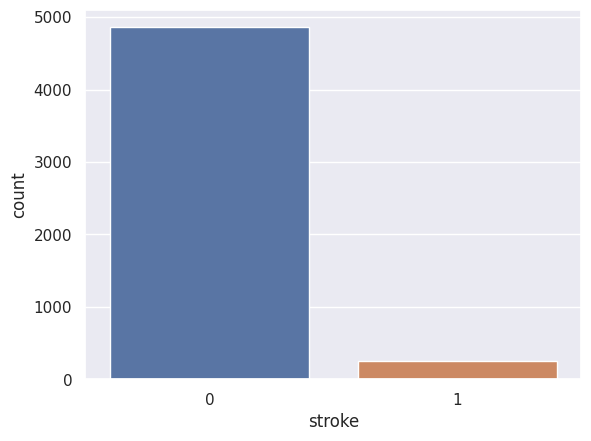

In [130]:
sns.countplot(data=df, x='stroke');

In [131]:
sm = SMOTE(k_neighbors=5, random_state=123)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)
print('Before OverSampling, the shape of X_train: {}'.format(X_train.shape))
print('Before OverSampling, the shape of y_train: {}'.format(y_train.shape))
print('After OverSampling, the shape of X_train_over: {}'.format(X_train_over.shape))
print('After OverSampling, the shape of y_train_over: {}'.format(y_train_over.shape))

Before OverSampling, the shape of X_train: (3831, 16)
Before OverSampling, the shape of y_train: (3831,)
After OverSampling, the shape of X_train_over: (7280, 16)
After OverSampling, the shape of y_train_over: (7280,)


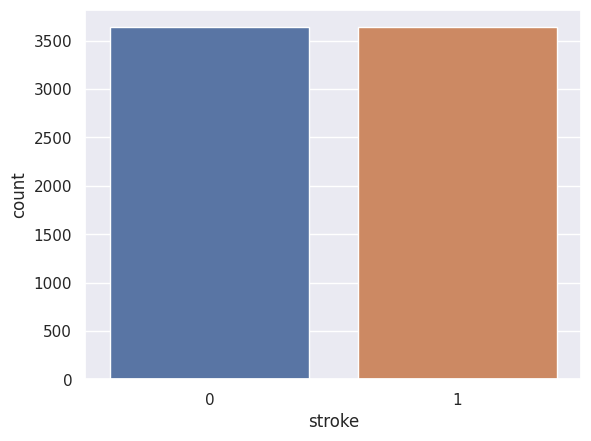

In [132]:
y_train_over_df = y_train_over.to_frame()
sns.countplot(data=y_train_over_df, x='stroke');

### Model 1 - Logistic Regression Classifier
* Logistic regression is a classification algorithm, used when the value of the target variable is categorical in nature.
* Logistic Regression is a good choice for this dataset because the target variable ('stroke') is binary, meaning it only has two possible outcomes (0 or 1).
* In this dataset, we are trying to predict whether a person is likely to have a stroke or not based on their age, gender, BMI, smoking habits, and other factors. So, we are using logistic regression to build a model that can predict whether someone is likely to have a stroke or not based on these factors. The model will analyze the relationships between the various factors and the likelihood of having a stroke, and it will use this information to make predictions for new data that it hasn't seen before.

In [133]:
# Object creation, fitting the data & getting predictions
lr= LogisticRegression()
lr.fit(X_train_over,y_train_over)
y_pred_lr = lr.predict(X_test)

### FEATURE IMPORTANCE

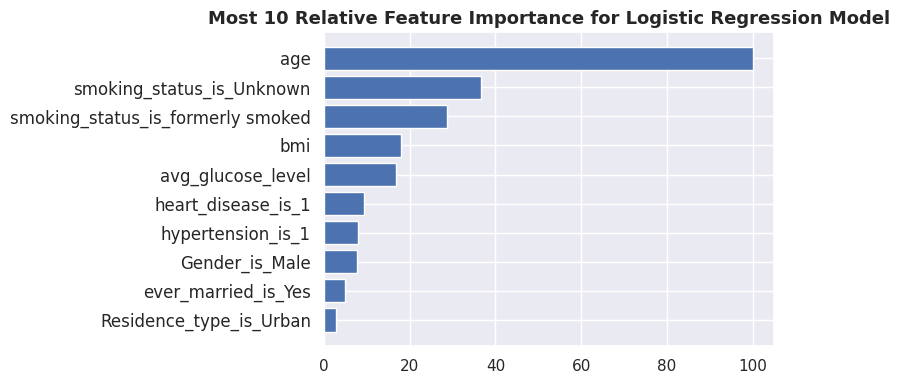

In [134]:

feature_importance = abs(lr.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())[0:10]
sorted_idx = np.argsort(feature_importance)[0:10]
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(8, 4))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
plt.title('Most 10 Relative Feature Importance for Logistic Regression Model', fontsize=13, fontweight='bold')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=12)

plt.tight_layout()
plt.show()

In [135]:
print('Accuracy score for testing set: ',round(accuracy_score(y_test,y_pred_lr),5))
print('F1 score for testing set: ',round(f1_score(y_test,y_pred_lr,average='weighted'),5))
print('Recall score for testing set: ',round(recall_score(y_test,y_pred_lr,average='weighted'),5))
print('Precision score for testing set: ',round(precision_score(y_test,y_pred_lr,average='weighted'),5))
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)

Accuracy score for testing set:  0.76291
F1 score for testing set:  0.83048
Recall score for testing set:  0.76291
Precision score for testing set:  0.93475
[[942 278]
 [ 25  33]]


### Model 2 - KNN Classifier
* The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other. K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.
* https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

KNN stands for k-Nearest Neighbors. It is a type of algorithm used in machine learning that helps us predict the outcome of a new data point by looking at the data points closest to it.

*Let's understand it with an example we have a new patient with the following characteristics:*

age: 60 years old
hypertension: yes
heart disease: no
ever married: yes
work type: private
residence type: urban
avg glucose level: 120
BMI: 27.5
smoking status: never smoked
We can use KNN to predict whether this patient is likely to have a stroke or not. We first select a value for the number of neighbors k, let's say k = 5. Then, we look at the 5 closest patients to this new patient based on their characteristics. We calculate the majority class among these 5 neighbors, and predict that the new patient belongs to that class.

let's say the 5 closest patients to our new patient are:

Patient A: age 58, hypertension yes, heart disease no, ever married yes, work type private, residence type urban, avg glucose level 110, BMI 25, smoking status never smoked, stroke no

Patient B: age 61, hypertension yes, heart disease yes, ever married yes, work type private, residence type rural, avg glucose level 130, BMI 28, smoking status never smoked, stroke no

Patient C: age 62, hypertension yes, heart disease no, ever married yes, work type private, residence type urban, avg glucose level 140, BMI 26, smoking status never smoked, stroke no

Patient D: age 58, hypertension yes, heart disease no, ever married no, work type children, residence type urban, avg glucose level 100, BMI 18, smoking status never smoked, stroke no

Patient E: age 65, hypertension yes, heart disease no, ever married yes, work type private, residence type urban, avg glucose level 160, BMI 30, smoking status never smoked, stroke yes

Among these 5 neighbors, 4 of them have no stroke and only 1 has had a stroke. Therefore, based on our KNN model, we predict that this new patient does not have a stroke.

**KNN**
* The following code creates 9 models for each K value from 3 to 9 and show the training and testing accuracies for each K.
* From the figure, we need to choose K value which is not too high and have the highest accuracies for testing and training sets
* When K gets higher, the model gets more complicated and requires more computational power and time.
* 3 looks good from the figure below according to the accuracies.


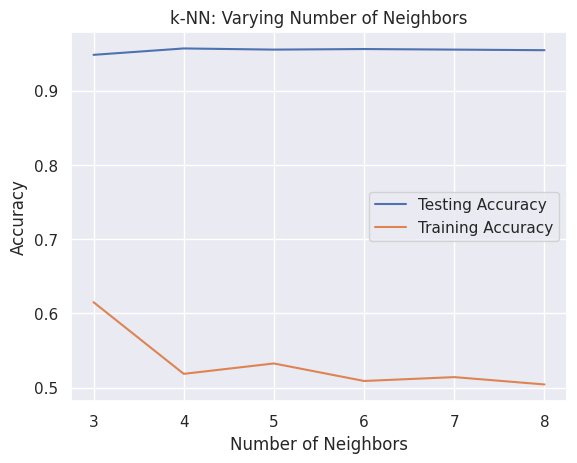

In [136]:

neighbors = np.arange(3, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_accuracy[i] = knn.score(X_train_over, y_train_over)
    test_accuracy[i] = knn.score(X_test, y_test)

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

This graph is showing the accuracy for different numbers of neighbors. The x-axis shows the number of neighbors used in the KNN algorithm and the y-axis shows the accuracy of the algorithm. The blue line shows the accuracy on the testing data and the orange line shows the accuracy on the training data.

As we increase the number of neighbors, the accuracy on the training data decreases and the accuracy on the testing data first increases, reaches a peak, and then starts to decrease. This is because when we have very few neighbors, the model is very complex and overfits the training data, resulting in poor performance on the testing data. As we increase the number of neighbors, the model becomes less complex and performs better on the testing data, but starts to underfit the training data, resulting in lower accuracy on the training data.

The peak of the testing accuracy represents the optimal number of neighbors to use in the KNN algorithm for this dataset.

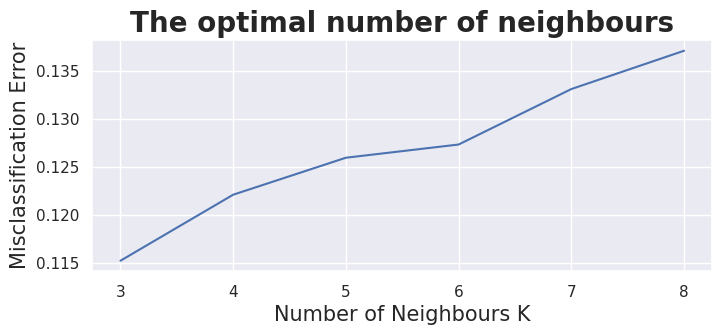

In [137]:
k_list = list(range(3,9,1))
cv_scores = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_over, y_train_over, cv=3, scoring='accuracy')
    cv_scores.append(scores.mean())

MSE = [1 - x for x in cv_scores]

plt.figure(figsize=(8,3))
plt.title('The optimal number of neighbours', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbours K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("darkgrid")
plt.plot(k_list, MSE);

plt.show();

The graph shows that the misclassification error decreases as the number of neighbors increases until it reaches a minimum point, after which it starts to increase again. In this case, the optimal number of neighbors appears to be around 5 or 6, where the misclassification error is the lowest. This means that using 5 or 6 neighbors in the KNN algorithm would likely result in the best performance in terms of accurately classifying the observations in the training set.

Keeping K=3

Creating the model

Calculating the predictions using the model

In [138]:
knn =KNeighborsClassifier(n_neighbors=3)
knn_model = knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

In [139]:
print("KNN MODEL SCORES")
print('Accuracy score for testing set: ',round(accuracy_score(y_test,y_pred_knn),5))
print('F1 score for testing set: ',round(f1_score(y_test,y_pred_knn,average='weighted'),5))
print('Recall score for testing set: ',round(recall_score(y_test,y_pred_knn,average='weighted'),5))
print('Precision score for testing set: ',round(precision_score(y_test,y_pred_knn,average='weighted'),5))
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)

KNN MODEL SCORES
Accuracy score for testing set:  0.94836
F1 score for testing set:  0.93518
Recall score for testing set:  0.94836
Precision score for testing set:  0.92707
[[1207   13]
 [  53    5]]


# **CONCLUSION**

---
I began by exploring the data and identified Age as a strong predictor of stroke. To further enhance the performance of our machine learning models, I delved into the crucial aspect of feature scaling through normalization techniques.

We tried two  models - Logistic Regression and KNN Classifier. However, it became evident that the choice of feature scaling significantly influenced our model's performance.

To better understand how Random Forest was using the data to achieve high accuracy, I examined feature importance and also used SHAP. This allowed us to gain insights into how the models made predictions and where they might be going wrong.

In conclusion, the adoption of normalization techniques, alongside careful model selection and tuning, played a pivotal role in improving the reliability and explainability of our machine learning solution for predicting stroke occurrences.